# Entendimento do Problema do Negócio

## Motivação

Qual o contexto?

- A marca que contratou os nossos serviços é a Marca 01. Numa análise prévia do mercado, sabemos que os atributos Serviço Humanizado, Dinamisno, Liderança, Qualidade do serviço, Custo Benefício, Identificação e Qualidade são importantes para a categoria.

Qual A Causa Raiz Do Problema? Por que?
 
- Ela está analisando o seu desempenho em relação aos seus concorrentes

Quem É O Dono Do Problema? Quem é o Stakeholder?

- Cliente

Qual O Formato Da Solução?
- Tipo de Problema = Analise de Desempenho


- Potencias Metodos = Analise Exploratória de Dados


- Tipo de entrega = 
Montar um documento, chamado de Yoda, que compila todos os dados presentes na base de dados.

## Desafio

1. Você precisa encontrar os mesmos números presentes nesse exemplo (não esqueça que você vai precisar deixar visível as fórmulas que usou para fazer os cálculos


2. Você é o Decision Scientist e sua tarefa é responder à seguinte questão: o nosso cliente tem um desempenho melhor do que os seus concorrentes nesses atributos?

# 0.0 IMPORTS

In [101]:
import pandas as pd
import inflection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate

from IPython.core.display import HTML
from IPython.display import Image

## 0.1 Helper Functions

In [108]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

def get_renda(string):
    output = []
    txt = string.split()
    regex = '[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
    for word in txt:
        match = re.search(regex, word)
        if match:
            output.append(match.group())
    return output

def analise_perfil(df, col, var):
    df = pd.DataFrame(df[col].value_counts(ascending=False)).reset_index()
    df.columns = [var, 'N_amostras']
    df['Percentual (%)'] = round((df['N_amostras'] / df['N_amostras'].sum()) * 100,2)
    return df
    

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib



## 0.1 CARREGANDO DADOS

In [4]:
df_raw = pd.read_csv('dataset.csv', sep=';')

# 1.0 DESCRIÇÃO DOS DADOS

In [5]:
df1 = df_raw.copy()

## 1.1 Renomeando Colunas

In [7]:
df1.columns = df1.columns.str.replace(' ', '_')

In [9]:
cols_old = []

for i in df1.columns:
    cols_old.append(i)

snakecase = lambda x: inflection.underscore( x )

cols_new = list(map( snakecase, cols_old ) )

# renomeando colunas
df1.columns = cols_new

## 1.2 Dimensão dos Dados

In [10]:
print(f'Números de Linhas: {df1.shape[0]}')
print(f'Números de Colunas: {df1.shape[1]}')

Números de Linhas: 511
Números de Colunas: 210


## 1.3 Tipo dos Dados

In [11]:
df1.dtypes

q01respondent_id                                                          int64
q03date_created                                                         float64
q06semanadoano                                                           object
q09semanadoprojeto                                                       object
q11_profissao                                                            object
q13_estado                                                               object
q14_sexo                                                                 object
q15_idade                                                                object
q16_escolaridade                                                         object
q17_renda                                                                object
q18_possui_seguro_nenhuma_das_anteriores                                 object
q18_possui_seguro_seguro_de_vida                                         object
q18_possui_seguro_seguro_de_automóvel   

## 1.4 Mudança dos Tipos

## 1.5 Valores Nulos

In [12]:
df1.isna().sum()

q01respondent_id                                                          0
q03date_created                                                           0
q06semanadoano                                                            0
q09semanadoprojeto                                                        0
q11_profissao                                                             0
q13_estado                                                                0
q14_sexo                                                                  0
q15_idade                                                                 0
q16_escolaridade                                                          0
q17_renda                                                                 0
q18_possui_seguro_nenhuma_das_anteriores                                418
q18_possui_seguro_seguro_de_vida                                        275
q18_possui_seguro_seguro_de_automóvel                                   250
q18_possui_s

## Genero

In [109]:
analise_genero = analise_perfil(df1, 'q14_sexo', 'Genero')
analise_genero

Genero  N_amostras  Percentual (%)
0  Masculino         347           67.91
1   Feminino         164           32.09

## Estado

In [110]:
analise_estado = analise_perfil(df1, 'q13_estado', 'Estado')
analise_estado

Estado  N_amostras  Percentual (%)
0             São Paulo         203           39.73
1        Rio de Janeiro          53           10.37
2          Minas Gerais          35            6.85
3        Santa Catarina          25            4.89
4                Paraná          25            4.89
5     Rio Grande do Sul          21            4.11
6                 Bahia          20            3.91
7            Pernambuco          19            3.72
8                 Ceará          13            2.54
9      Distrito Federal          10            1.96
10                Goiás           9            1.76
11       Espírito Santo           8            1.57
12             Maranhão           8            1.57
13   Mato Grosso do Sul           8            1.57
14                 Pará           7            1.37
15  Rio Grande do Norte           6            1.17
16              Sergipe           5            0.98
17                Piauí           5            0.98
18                Amapá           4            0.78
19          Mato Grosso           4            0.78
20              Alagoas           4            0.78
21              Paraíba           4            0.78
22             Rondônia           4            0.78
23            Tocantins           4            0.78
24                 Acre           3            0.59
25             Amazonas           3            0.59
26              Roraima           1            0.20

## Idade

In [111]:
analise_idade = analise_perfil(df1, 'q15_idade', 'Idade')
analise_idade.sort_values(['Idade', 'N_amostras'], ascending=True)

Idade  N_amostras  Percentual (%)
20  18 anos          11            2.15
33  19 anos           3            0.59
21  20 anos          11            2.15
22  21 anos          10            1.96
17  22 anos          14            2.74
11  23 anos          18            3.52
5   24 anos          24            4.70
7   25 anos          21            4.11
0   26 anos          30            5.87
4   27 anos          24            4.70
9   28 anos          21            4.11
10  29 anos          19            3.72
13  30 anos          18            3.52
6   31 anos          23            4.50
12  32 anos          18            3.52
3   33 anos          25            4.89
1   34 anos          28            5.48
2   35 anos          27            5.28
8   36 anos          21            4.11
16  37 anos          15            2.94
23  38 anos          10            1.96
15  39 anos          16            3.13
14  40 anos          17            3.33
19  41 anos          11            2.15
24  42 anos           8            1.57
28  43 anos           5            0.98
25  44 anos           6            1.17
18  45 anos          11            2.15
41  46 anos           1            0.20
26  47 anos           5            0.98
36  48 anos           2            0.39
27  49 anos           5            0.98
31  50 anos           3            0.59
29  51 anos           5            0.98
34  52 anos           3            0.59
38  53 anos           2            0.39
30  54 anos           5            0.98
39  55 anos           2            0.39
35  56 anos           3            0.59
32  57 anos           3            0.59
37  58 anos           2            0.39
40  59 anos           2            0.39
43  62 anos           1            0.20
42  65 anos           1            0.20
44  67 anos           1            0.20

## 1.6 Descrição Estatistica 

In [13]:
numerical_attributes = df1.select_dtypes(include = ['int64', 'float64'])
categorical_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]'])

## 1.6.1 Atributos Numéricos

In [14]:
# Tendência Central - média, mediana
ct1 = pd.DataFrame( numerical_attributes.apply(np.mean)).T
ct2 = pd.DataFrame( numerical_attributes.apply(np.median)).T

# Dispersão - std, min, max, intervalo, skw, kurtosis
d1 = pd.DataFrame( numerical_attributes.apply( np.std )).T
d2 = pd.DataFrame( numerical_attributes.apply( min )).T
d3 = pd.DataFrame( numerical_attributes.apply( max )).T
d4 = pd.DataFrame( numerical_attributes.apply( lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( numerical_attributes.apply( lambda x: x.skew())).T
d6 = pd.DataFrame( numerical_attributes.apply( lambda x: x.kurtosis())).T

# concate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5,d6] ).T.reset_index()
m.columns = ['atributos', 'min', 'max', 'intervalo', 'media', 'mediana', 'desvio_padrao (std)', 'distribuicao (skew)', 'assimetria (kurtosis)']
m

atributos           min           max     intervalo         media       mediana  desvio_padrao (std)  distribuicao (skew)  assimetria (kurtosis)
0                                     q01respondent_id  1.266479e+10  1.277406e+10  1.092634e+08  1.271912e+10  1.272340e+10         3.178306e+07            -0.002017              -1.251891
1                                      q03date_created  4.433373e+04  4.437285e+04  3.911980e+01  4.435302e+04  4.435485e+04         1.161130e+01             0.001415              -1.257618
2                          q19_contratou_seguro_outros           NaN           NaN           NaN           NaN           NaN                  NaN                  NaN                    NaN
3          q22_contratar_seguro_nenhuma_das_anteriores           NaN           NaN           NaN           NaN           NaN                  NaN                  NaN                    NaN
4                 q23_atitude_geral_seguro_importancia  0.000000e+00  1.000000e+01  1.000000e+01  8.694716e+00  1.000000e+01         1.902916e+00            -1.534934               1.934564
5        q23_atitude_geral_seguro_prioridade_orcamento  0.000000e+00  1.000000e+01  1.000000e+01  7.896282e+00  9.000000e+00         2.441288e+00            -1.123255               0.767116
6    q23_atitude_geral_seguro_substitui_entretenimento  0.000000e+00  1.000000e+01  1.000000e+01  4.170254e+00  5.000000e+00         3.461894e+00             0.167107              -1.299249
7                    q24_ordenar_seguro_seguro_de_vida  1.000000e+00  5.000000e+00  4.000000e+00  2.463796e+00  2.000000e+00         1.304126e+00             0.586509              -0.782179
8               q24_ordenar_seguro_seguro_de_automóvel  1.000000e+00  5.000000e+00  4.000000e+00  2.931507e+00  3.000000e+00         1.216812e+00            -0.058141              -0.970462
9                q24_ordenar_seguro_seguro_residencial  1.000000e+00  5.000000e+00  4.000000e+00  3.318982e+00  3.000000e+00         9.842258e-01            -0.266136              -0.270530
10                  q24_ordenar_seguro_seguro_de_saúde  1.000000e+00  5.000000e+00  4.000000e+00  2.017613e+00  2.000000e+00         1.210555e+00             1.041577              -0.005532
11   q24_ordenar_seguro_seguro_de_bens_duráveis_(ex...  1.000000e+00  5.000000e+00  4.000000e+00  4.268102e+00  5.000000e+00         1.190529e+00            -1.611413               1.467808
12                                   q25_uso_internet1  0.000000e+00  1.000000e+01  1.000000e+01  8.692759e+00  1.000000e+01         1.903115e+00            -1.625429               2.586403
13                                   q25_uso_internet2  0.000000e+00  1.000000e+01  1.000000e+01  7.949119e+00  8.000000e+00         2.303183e+00            -1.056761               0.547093
14                                   q25_uso_internet3  2.000000e+00  1.000000e+01  8.000000e+00  9.046967e+00  1.000000e+01         1.548228e+00            -1.754081               2.656401
15                                   q25_uso_internet4  0.000000e+00  1.000000e+01  1.000000e+01  8.201566e+00  9.000000e+00         2.262707e+00            -1.333903               1.309034
16                                     q26_transacoes1  0.000000e+00  1.000000e+01  1.000000e+01  8.483366e+00  9.000000e+00         1.975193e+00            -1.629476               2.877402
17                                     q26_transacoes2  0.000000e+00  1.000000e+01  1.000000e+01  6.667319e+00  7.000000e+00         2.970647e+00            -0.703514              -0.427057
18                                     q26_transacoes3  0.000000e+00  1.000000e+01  1.000000e+01  7.681018e+00  8.000000e+00         2.550855e+00            -1.200536               0.930131
19                                     q26_transacoes4  0.000000e+00  1.000000e+01  1.000000e+01  7.328767e+00  8.000000e+00         2.997314e+00            -1.061700               0.111179
20                                     q26_transacoes5 

## 1.6.2 Atributos Categóricos

In [15]:
categorical_atr_unicos = pd.DataFrame(categorical_attributes.apply(lambda x: x.unique().shape[0])).reset_index()
categorical_atr_unicos.columns= ['variavel', 'categorias']
categorical_atr_unicos

variavel  categorias
0                                      q06semanadoano           6
1                                  q09semanadoprojeto           6
2                                       q11_profissao          18
3                                          q13_estado          27
4                                            q14_sexo           2
5                                           q15_idade          45
6                                    q16_escolaridade          12
7                                           q17_renda          15
8            q18_possui_seguro_nenhuma_das_anteriores           2
9                    q18_possui_seguro_seguro_de_vida           2
10              q18_possui_seguro_seguro_de_automóvel           2
11               q18_possui_seguro_seguro_residencial           2
12                  q18_possui_seguro_seguro_de_saúde           2
13  q18_possui_seguro_seguro_de_bens_duráveis_(ex:...           2
14                           q18_possui_seguro_outros           2
15                q19_contratou_seguro_seguro_de_vida           3
16           q19_contratou_seguro_seguro_de_automóvel           3
17            q19_contratou_seguro_seguro_residencial           3
18               q19_contratou_seguro_seguro_de_saúde           3
19  q19_contratou_seguro_seguro_de_bens_duráveis_(...           3
20                               q20_pretende_renovar           3
21                             q21_pretende_contratar           2
22                q22_contratar_seguro_seguro_de_vida           2
23           q22_contratar_seguro_seguro_de_automóvel           2
24            q22_contratar_seguro_seguro_residencial           2
25               q22_contratar_seguro_seguro_de_saúde           2
26  q22_contratar_seguro_seguro_de_bens_duráveis_(...           2
27                        q22_contratar_seguro_outros           2
28                                     q31_aw_marca01           2
29                                     q31_aw_marca02           2
30                                     q31_aw_marca03           2
31                                     q31_aw_marca04           2
32                                     q31_aw_marca05           2
33                                     q31_aw_marca06           2
34                                     q31_aw_marca07           2
35                      q32_kn_nenhuma_das_anteriores           2
36                                     q32_kn_marca01           2
37                                     q32_kn_marca02           2
38                                     q32_kn_marca03           2
39                                     q32_kn_marca04           2
40                                     q32_kn_marca05           2
41                                     q32_kn_marca06           2
42                                     q32_kn_marca07           2
43                      q33_li_nenhuma_das_anteriores           2
44                                     q33_li_marca01           2
45                                     q33_li_marca02           2
46                                     q33_li_marca03           2
47                                     q33_li_marca04           2
48                                     q33_li_marca05           2
49                                     q33_li_marca06           2
50                                     q33_li_marca07           2
51                      q34_co_nenhuma_das_anteriores           2
52                                     q34_co_marca01           2
53                                     q34_co_marca02           2
54                                     q34_co_marca03           2
55                                     q34_co_marca04           2
56                                     q34_co_marca05           2
57                                     q34_co_marca06           2
58                                     q34_co_marca07           2
59                                    q35_preferencia          10
60                 

# 2.0 FEATURE ENGINEERING

In [16]:
# classe social
df1['valor_inicial'] = df1['q17_renda'].apply(lambda x: 0 if len(get_renda(x)) < 2 else get_renda(x)[0] )
df1['valor_inicial'] = df1['valor_inicial'].str.replace(',', '')
df1['valor_inicial'] = pd.to_numeric(df1['valor_inicial'])
df1['valor_final'] = df1['q17_renda'].apply(lambda x: get_renda(x)[0] if len(get_renda(x)) < 2 else get_renda(x)[1])
df1['valor_final'] = df1['valor_final'].str.replace(',', '')
df1['valor_final'] = pd.to_numeric(df1['valor_final']).astype(float)
df1['classe_social'] = np.select(
                                [df1['valor_final'].gt(11.261), 
                                 df1['valor_final'].between(8.641,11.261), 
                                 df1['valor_final'].between(2.005,8.640),
                                 df1['valor_final'].between(1.255, 2.004),
                                 df1['valor_final'].lt(1.254)], 
                                 ['A', 'B','C','D','E'])

## 2.1 Mapa Mental de Hipoteses

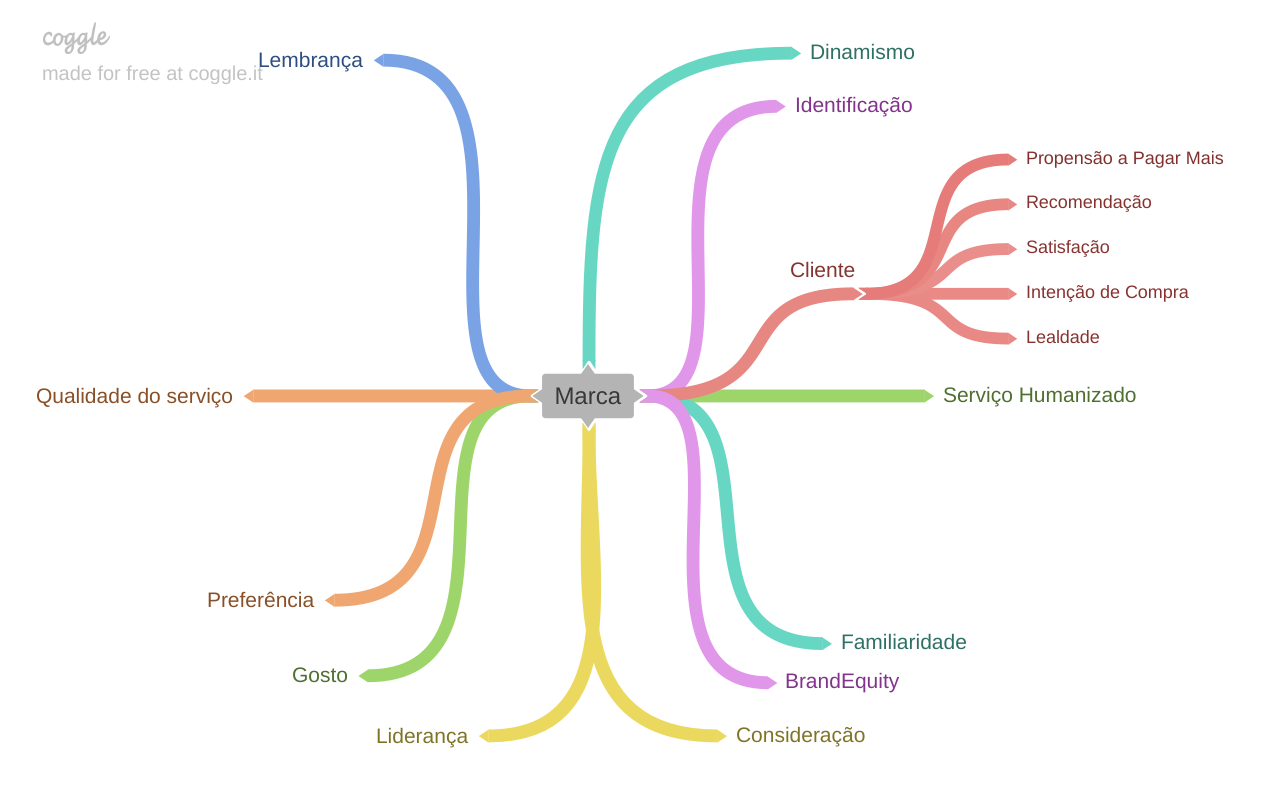

In [17]:
Image('imgs/MapaMental.png')

## 2.1 Criação das Hipoteses

## 2.1.3 Hipotese Liderança

**1.** Marcas que possuem atributo Liderança deveriam ter mais Satisfação.

**2.** Marcas que possuem atributo Liderança deveriam ter mais Identifacação.

**3.** Marcas que possuem atributo Liderança deveriam ter mais Lealdade.

## 2.1.4 Hipotese Qualidade do Serviço

**1.** Marcas que possuem o atributo Qualidade de Serviço deveriam ter mais Propensão a Pagar mais pelo serviço e/ou prouto da Marca.

**2.** Marcas que possuem o atributo Qualidade de Serviço deveriam ter mais Intenção de Compra.

## 2.1.5 Hipotese Custo Benefício

**1.** Marcas que possuem o atributo Custo Beneficio deveriam ter mais Recomendação.

**2.** Marcas que possuem o atributo Custo Beneficio deveriam ter mais Intenção de Compra.

## 2.1.6 Hipotese Identificação

**1.** Marcas que possuem o atributo Identificação deveriam ter mais Autenticidade.

**2.** Marcas que possuem o atributo Identificação deveriam ter mais Lealdade.

## 2.1.7 Hipotese BrandEquity

**1.** Marcas que possuem Brand Equity deveriam ter mais Identificação.

**2.** Marcas que possuem Brand Equity deveriam ter mais Propensão a Pagar mais.

## 2.1.8 Hipotese Satisfação

**1.** Marcas que possuem o atributo Satisfação deveriam ter mais Lealdade.

**2.** Marcas que possuem o atributo Satisfação deveriam ter mais Recomendação.

## 2.1.9 Hipotese Lealdade

**1.** Marcas que possuem o atributo Lealdade deveriam ter mais Intenção de Compra.

**1.** Marcas que possuem o atributo Lealdade deveriam ter mais Identificação.

## 2.2.1 Hipotese Intenção de Compra

**1.** Marcas que possuem maior Intenção de Compra deveriam ter mais Satisfação.

## 2.2.2 Hipotese Recomendação

**1.** Marcas que possuem maior Recomendação deveriam ter mais Propensão a Pagar Mais.

## 2.2.3 Hipotese Propensão a Pagar Mais

 **1.** Marcas que possuem maior Propensão a Pagar Mais deveriam ter mais Lealdade.

**2.** Marcas que possuem maior Propensão a Pagar Mais deveriam ter mais Beneficios.

## 2.2.4 Lista Final de Hipoteses

**1.** Marcas que possuem atributo Liderança deveriam ter mais Satisfação.

**2.** Marcas que possuem atributo Liderança deveriam ter mais Identifacação.

**3.** Marcas que possuem atributo Liderança deveriam ter mais Lealdade.

**4.** Marcas que possuem o atributo Qualidade de Serviço deveriam ter mais Propensão a Pagar mais pelo serviço e/ou prouto da Marca.

**5.** Marcas que possuem o atributo Qualidade de Serviço deveriam ter mais Intenção de Compra.

**6.** Marcas que possuem o atributo Custo Beneficio deveriam ter mais Recomendação.

**7.** Marcas que possuem o atributo Custo Beneficio deveriam ter mais Intenção de Compra.

**8.** Marcas que possuem o atributo Identificação deveriam ter mais Autenticidade.

**9.** Marcas que possuem o atributo Identificação deveriam ter mais Lealdade.

**10.** Marcas que possuem Brand Equity deveriam ter mais Identificação.

**11.** Marcas que possuem Brand Equity deveriam ter mais Propensão a Pagar mais.

**12.** Marcas que possuem o atributo Satisfação deveriam ter mais Lealdade.

**13.** Marcas que possuem o atributo Satisfação deveriam ter mais Recomendação.

**14.** Marcas que possuem o atributo Lealdade deveriam ter mais Intenção de Compra.

**15.** Marcas que possuem o atributo Lealdade deveriam ter mais Identificação.

**16.** Marcas que possuem maior Intenção de Compra deveriam ter mais Satisfação.

**17.** Marcas que possuem maior Recomendação deveriam ter mais Propensão a Pagar Mais.

# 3.0 FILTRAGEM DAS VARIAVEIS

In [180]:
df3 = df1.copy()

## 3.1 Filtragem das Linhas

In [20]:
df3 = df3[df3['q40_avaliou_marca01'] == 'Marca01'].reset_index()

## 3.2 Seleção das Colunas

In [139]:
colunas_avaliacoes = ['q47_credibilidade1'
, 'q48_diversao1'
, 'q49_audacia1'
, 'q50_sofisticacao1'
, 'q51_sensibilidade1'
, 'q52_alta_classe1'
, 'q53_acessibilidade1'
, 'q54_lideranca1'
, 'q55_descolada1'
, 'q56_variedade1'
, 'q57_servico_humanizado1'
, 'q58_qualidade1'
, 'q59_atratividade1'
, 'q60_responsabilidade_socio_ambiental1'
, 'q61_autenticidade1'
, 'q61_tecnologica'
, 'q62_beneficios1'
, 'q63_dinamismo1'
, 'q64_cuidado_humano1'
, 'q65_qualidade_servico1'
, 'q66_custo_beneficio1'
, 'q67_diversidade1'
, 'q68_risco1'
, 'q69_satisfacao1'
, 'q70_lealdade1'
, 'q71_intencao_compra1'
, 'q72_recomendacao1'
, 'q73_brand_equity1'
, 'q74_pagar_mais1'
, 'q75_identificacao1']

df3 = df3[colunas_avaliacoes]

# 4.0 ANALISE EXPLORATÓRIA DOS DADOS E REPORTING

In [181]:
df4 = df3.copy()

## 4.1 Analise Funil

In [182]:
marcas = ['Marca01', 'Marca02', 'Marca03', 'Marca04', 'Marca05', 'Marca06', 'Marca07']

indicador_preferencia = pd.DataFrame(df1['q35_preferencia'].value_counts(normalize=True).round(2)).T



indicador_marca01 = {   'Lembraça':     [round(df1['q31_aw_marca01'].count() / df1.shape[0], 2)]
                      , 'Familiaridade': [round(df1['q32_kn_marca01'].count() / df1.shape[0], 2)]
                      , 'Gosto':         [round(df1['q33_li_marca01'].count() / df1.shape[0], 2)]
                      , 'Consideração':  [round(df1['q34_co_marca01'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca01']
                      , 'Cliente':       [round(df1['q36_cl_marca01'].count() / df1.shape[0], 2)]}

indicador_marca02 = {'Lembraça': [round(df1['q31_aw_marca02'].count() / df1.shape[0],  2)]
                      ,'Familiaridade': [round(df1['q32_kn_marca02'].count() / df1.shape[0], 2)]
                      , 'Gosto': [round(df1['q33_li_marca02'].count() / df1.shape[0], 2)]
                      ,'Consideração': [round(df1['q34_co_marca02'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca02']
                      ,'Cliente': [round(df1['q36_cl_marca02'].count() / df1.shape[0], 2)]}

indicador_marca03 = {'Lembraça': [round(df1['q31_aw_marca03'].count() / df1.shape[0],  2)]
                      ,'Familiaridade': [round(df1['q32_kn_marca03'].count() / df1.shape[0], 2)]
                      , 'Gosto': [round(df1['q33_li_marca03'].count() / df1.shape[0], 2)]
                      ,'Consideração': [round(df1['q34_co_marca03'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca03']
                      ,'Cliente': [round(df1['q36_cl_marca03'].count() / df1.shape[0], 2)]}

indicador_marca04 = {'Lembraça': [round(df1['q31_aw_marca04'].count() / df1.shape[0],  2)]
                      ,'Familiaridade': [round(df1['q32_kn_marca04'].count() / df1.shape[0], 2)]
                      , 'Gosto': [round(df1['q33_li_marca04'].count() / df1.shape[0], 2)]
                      ,'Consideração': [round(df1['q34_co_marca04'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca04']
                      ,'Cliente': [round(df1['q36_cl_marca04'].count() / df1.shape[0], 2)]}

indicador_marca05 = {'Lembraça': [round(df1['q31_aw_marca05'].count() / df1.shape[0],  2)]
                      ,'Familiaridade': [round(df1['q32_kn_marca05'].count() / df1.shape[0], 2)]
                      , 'Gosto': [round(df1['q33_li_marca05'].count() / df1.shape[0], 2)]
                      ,'Consideração': [round(df1['q34_co_marca05'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca05']
                      ,'Cliente': [round(df1['q36_cl_marca05'].count() / df1.shape[0], 2)]}

indicador_marca06 = {'Lembraça': [round(df1['q31_aw_marca06'].count() / df1.shape[0],  2)]
                      ,'Familiaridade': [round(df1['q32_kn_marca06'].count() / df1.shape[0], 2)]
                      , 'Gosto': [round(df1['q33_li_marca06'].count() / df1.shape[0], 2)]
                      ,'Consideração': [round(df1['q34_co_marca06'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca06']
                      ,'Cliente': [round(df1['q36_cl_marca06'].count() / df1.shape[0], 2)]}

indicador_marca07 = {'Lembraça': [round(df1['q31_aw_marca07'].count() / df1.shape[0],  2)]
                      ,'Familiaridade': [round(df1['q32_kn_marca07'].count() / df1.shape[0], 2)]
                      , 'Gosto': [round(df1['q33_li_marca07'].count() / df1.shape[0], 2)]
                      ,'Consideração': [round(df1['q34_co_marca07'].count() / df1.shape[0], 2)]
                      , 'Preferência': indicador_preferencia['Marca07']
                      ,'Cliente': [round(df1['q36_cl_marca07'].count() / df1.shape[0], 2)]}

marca01 = pd.DataFrame(indicador_marca01)
marca02 = pd.DataFrame(indicador_marca02)
marca03 = pd.DataFrame(indicador_marca03)
marca04 = pd.DataFrame(indicador_marca04)
marca05 = pd.DataFrame(indicador_marca05)
marca06 = pd.DataFrame(indicador_marca06)
marca07 = pd.DataFrame(indicador_marca07)

tabela_indicadores = pd.concat([marca01, marca02, marca03, marca04, marca05, marca06, marca07], join='outer').T
tabela_indicadores.columns = ['Marca01', 'Marca02', 'Marca03', 'Marca04', 'Marca05', 'Marca06', 'Marca07']
tabela_indicadores

Marca01  Marca02  Marca03  Marca04  Marca05  Marca06  Marca07
Lembraça          0.34     0.88     0.89     0.95     0.31     0.65     0.63
Familiaridade     0.11     0.43     0.67     0.59     0.10     0.24     0.25
Gosto             0.07     0.24     0.54     0.37     0.06     0.15     0.14
Consideração      0.06     0.17     0.46     0.29     0.05     0.11     0.09
Preferência       0.04     0.12     0.41     0.24     0.02     0.08     0.05
Cliente           0.03     0.13     0.24     0.21     0.03     0.05     0.05

In [222]:
data = tabela_indicadores
fig = px.funnel(data)
fig.show()

## 4.2 Analise das Avaliações

In [184]:
colunas_indicadores = ['q23_atitude_geral_seguro_importancia'
, 'q23_atitude_geral_seguro_prioridade_orcamento'
, 'q23_atitude_geral_seguro_substitui_entretenimento'
, 'q25_uso_internet1'
, 'q25_uso_internet2'
, 'q25_uso_internet3'
, 'q25_uso_internet4'
, 'q26_transacoes1'
, 'q26_transacoes2'
, 'q26_transacoes3'
, 'q26_transacoes4'
, 'q26_transacoes5'
, 'q26_transacoes6'
, 'q27_antenado1'
, 'q27_antenado2'
, 'q27_antenado3'
, 'q27_antenado4'
, 'q47_credibilidade1'
, 'q47_credibilidade2'
, 'q47_credibilidade3'
, 'q48_diversao1'
, 'q48_diversao2'
, 'q48_diversao3'
, 'q49_audacia1'
, 'q49_audacia2'
, 'q49_audacia3'
, 'q50_sofisticacao1'
, 'q50_sofisticacao2'
, 'q50_sofisticacao3'
, 'q51_sensibilidade1'
, 'q51_sensibilidade2'
, 'q51_sensibilidade3'
, 'q52_alta_classe1'
, 'q52_alta_classe2'
, 'q52_alta_classe3'
, 'q52_alta_classe4'
, 'q52_alta_classe5'
, 'q53_acessibilidade1'
, 'q53_acessibilidade2'
, 'q53_acessibilidade3'
, 'q54_lideranca1'
, 'q54_lideranca2'
, 'q54_lideranca3'
, 'q54_lideranca4'
, 'q55_descolada1'
, 'q55_descolada2'
, 'q55_descolada3'
, 'q56_variedade1'
, 'q56_variedade2'
, 'q56_variedade3'
, 'q56_variedade4'
, 'q56_variedade5'
, 'q57_servico_humanizado1'
, 'q57_servico_humanizado2'
, 'q57_servico_humanizado3'
, 'q57_servico_humanizado4'
, 'q57_servico_humanizado5'
, 'q57_servico_humanizado6'
, 'q58_qualidade1'
, 'q58_qualidade2'
, 'q58_qualidade3'
, 'q58_qualidade4'
, 'q59_atratividade1'
, 'q59_atratividade2'
, 'q60_responsabilidade_socio_ambiental1'
, 'q60_responsabilidade_socio_ambiental2'
, 'q60_responsabilidade_socio_ambiental3'
, 'q61_autenticidade1'
, 'q61_autenticidade2'
, 'q61_autenticidade3'
, 'q61_autenticidade4'
, 'q61_autenticidade5'
, 'q61_autenticidade6'
, 'q61_autenticidade7'
, 'q61_tecnologica'
, 'q62_beneficios1'
, 'q62_beneficios2'
, 'q62_beneficios3'
, 'q63_dinamismo1'
, 'q63_dinamismo2'
, 'q63_dinamismo3'
, 'q64_cuidado_humano1'
, 'q64_cuidado_humano2'
, 'q64_cuidado_humano3'
, 'q65_qualidade_servico1'
, 'q65_qualidade_servico2'
, 'q65_qualidade_servico3'
, 'q66_custo_beneficio1'
, 'q66_custo_beneficio2'
, 'q66_custo_beneficio3'
, 'q67_diversidade1'
, 'q68_risco1'
, 'q68_risco2'
, 'q68_risco3'
, 'q69_satisfacao1'
, 'q69_satisfacao2'
, 'q69_satisfacao3'
, 'q69_satisfacao4'
, 'q70_lealdade1'
, 'q70_lealdade2'
, 'q70_lealdade3'
, 'q71_intencao_compra1'
, 'q71_intencao_compra2'
, 'q71_intencao_compra3'
, 'q72_recomendacao1'
, 'q72_recomendacao2'
, 'q72_recomendacao3'
, 'q73_brand_equity1'
, 'q73_brand_equity2'
, 'q73_brand_equity3'
, 'q73_brand_equity4'
, 'q73_brand_equity5'
, 'q74_pagar_mais1'
, 'q74_pagar_mais2'
, 'q74_pagar_mais3'
, 'q75_identificacao1'
, 'q75_identificacao2'
, 'q75_identificacao3']



resultado = []

for col in colunas_indicadores:
    
    df_temp = df1[col].dropna()
    
    r = np.select(
    [
        df_temp.gt(6), 
        df_temp.between(4,6), 
        df_temp.lt(4), 
    ],
    [
       'TOP',
        'NEUTRO',
        'BOTTOM'
    ]  
    )
    resultado.append(pd.Series(r, name=col).value_counts(normalize=True).multiply(100).round())
df_notas = pd.concat(resultado, axis=1).T
df_notas.insert(0, 'MEDIA', df1.mean(axis=0).round(1))
df_notas


titulos = ['satisfacao', 'recomendacao', 'pagar_mais', 'intencao_compra', 'brand_equity', 'identificacao', 'risco', 'lealdade', 'autenticidade', 'beneficios', 'dinamismo'
        , 'tecnologica', 'cuidado_humano', 'credibilidade', 'uso_internet', 'diversidade', 'custo_beneficio'
        , 'transacoes', 'antenado', 'diversao', 'audacia', 'sofisticacao', 'acessibilidade', 'socio_ambiental', r'qualidade\d', 'qualidade_servico', 'atratividade']

for i in titulos:
    
    filtro = df_notas.index.str.contains(i)
    
    print('\n', i.upper().center(40,'-'))
    
    display(df_notas[filtro])


 ---------------SATISFACAO---------------


C:\Users\vinic\AppData\Local\Temp\ipykernel_17064\1523375003.py:142: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_notas.insert(0, 'MEDIA', df1.mean(axis=0).round(1))


MEDIA   TOP  NEUTRO  BOTTOM
q69_satisfacao1    8.5  85.0     8.0     7.0
q69_satisfacao2    8.6  85.0     9.0     5.0
q69_satisfacao3    8.4  83.0    12.0     5.0
q69_satisfacao4    8.5  84.0    11.0     5.0


 --------------RECOMENDACAO--------------


MEDIA   TOP  NEUTRO  BOTTOM
q72_recomendacao1    6.8  59.0    27.0    14.0
q72_recomendacao2    6.8  59.0    26.0    15.0
q72_recomendacao3    7.3  67.0    23.0    10.0


 ---------------PAGAR_MAIS---------------


MEDIA   TOP  NEUTRO  BOTTOM
q74_pagar_mais1    5.4  43.0    27.0    30.0
q74_pagar_mais2    5.3  41.0    29.0    30.0
q74_pagar_mais3    5.2  41.0    28.0    32.0


 ------------INTENCAO_COMPRA-------------


MEDIA   TOP  NEUTRO  BOTTOM
q71_intencao_compra1    6.4  55.0    27.0    18.0
q71_intencao_compra2    6.4  53.0    29.0    18.0
q71_intencao_compra3    6.9  62.0    24.0    14.0


 --------------BRAND_EQUITY--------------


MEDIA   TOP  NEUTRO  BOTTOM
q73_brand_equity1    6.8  58.0    28.0    14.0
q73_brand_equity2    6.6  57.0    29.0    14.0
q73_brand_equity3    5.8  49.0    25.0    26.0
q73_brand_equity4    6.2  50.0    31.0    20.0
q73_brand_equity5    7.7  71.0    22.0     7.0


 -------------IDENTIFICACAO--------------


MEDIA   TOP  NEUTRO  BOTTOM
q75_identificacao1    6.1  51.0    28.0    21.0
q75_identificacao2    6.1  52.0    28.0    20.0
q75_identificacao3    5.5  44.0    28.0    29.0


 -----------------RISCO------------------


MEDIA   TOP  NEUTRO  BOTTOM
q68_risco1    7.4  69.0    20.0    11.0
q68_risco2    7.5  68.0    23.0     9.0
q68_risco3    7.5  69.0    21.0    10.0


 ----------------LEALDADE----------------


MEDIA   TOP  NEUTRO  BOTTOM
q70_lealdade1    7.6  71.0    19.0    11.0
q70_lealdade2    8.2  77.0    16.0     7.0
q70_lealdade3    7.8  76.0    17.0     7.0


 -------------AUTENTICIDADE--------------


MEDIA   TOP  NEUTRO  BOTTOM
q61_autenticidade1    6.5  53.0    35.0    11.0
q61_autenticidade2    7.1  65.0    25.0    10.0
q61_autenticidade3    7.5  72.0    21.0     8.0
q61_autenticidade4    6.9  60.0    31.0     9.0
q61_autenticidade5    7.6  70.0    26.0     5.0
q61_autenticidade6    7.6  71.0    23.0     5.0
q61_autenticidade7    6.9  59.0    31.0    10.0


 ---------------BENEFICIOS---------------


MEDIA   TOP  NEUTRO  BOTTOM
q62_beneficios1    7.3  67.0    25.0     8.0
q62_beneficios2    7.5  69.0    24.0     7.0
q62_beneficios3    6.9  59.0    31.0    10.0


 ---------------DINAMISMO----------------


MEDIA   TOP  NEUTRO  BOTTOM
q63_dinamismo1    7.4  69.0    25.0     5.0
q63_dinamismo2    6.7  56.0    34.0    11.0
q63_dinamismo3    6.8  57.0    33.0    10.0


 --------------TECNOLOGICA---------------


MEDIA   TOP  NEUTRO  BOTTOM
q61_tecnologica    8.0  76.0    21.0     3.0


 -------------CUIDADO_HUMANO-------------


MEDIA   TOP  NEUTRO  BOTTOM
q64_cuidado_humano1    7.6  72.0    22.0     5.0
q64_cuidado_humano2    7.5  70.0    23.0     7.0
q64_cuidado_humano3    6.8  59.0    31.0    10.0


 -------------CREDIBILIDADE--------------


MEDIA   TOP  NEUTRO  BOTTOM
q47_credibilidade1    8.0  77.0    18.0     5.0
q47_credibilidade2    8.0  77.0    19.0     4.0
q47_credibilidade3    8.0  78.0    17.0     5.0


 --------------USO_INTERNET--------------


MEDIA   TOP  NEUTRO  BOTTOM
q25_uso_internet1    8.7  86.0    11.0     2.0
q25_uso_internet2    7.9  75.0    20.0     5.0
q25_uso_internet3    9.0  92.0     7.0     1.0
q25_uso_internet4    8.2  80.0    15.0     5.0


 --------------DIVERSIDADE---------------


MEDIA   TOP  NEUTRO  BOTTOM
q67_diversidade1    7.3  64.0    29.0     7.0


 ------------CUSTO_BENEFICIO-------------


MEDIA   TOP  NEUTRO  BOTTOM
q66_custo_beneficio1    7.2  64.0    27.0     9.0
q66_custo_beneficio2    7.4  65.0    26.0     8.0
q66_custo_beneficio3    7.3  67.0    25.0     8.0


 ---------------TRANSACOES---------------


MEDIA   TOP  NEUTRO  BOTTOM
q26_transacoes1    8.5  85.0    12.0     3.0
q26_transacoes2    6.7  60.0    24.0    16.0
q26_transacoes3    7.7  73.0    19.0     7.0
q26_transacoes4    7.3  68.0    18.0    13.0
q26_transacoes5    9.4  95.0     4.0     1.0
q26_transacoes6    5.6  47.0    20.0    34.0


 ----------------ANTENADO----------------


MEDIA   TOP  NEUTRO  BOTTOM
q27_antenado1    9.1  95.0     4.0     0.0
q27_antenado2    9.1  95.0     4.0     0.0
q27_antenado3    9.2  94.0     5.0     0.0
q27_antenado4    9.4  96.0     3.0     1.0


 ----------------DIVERSAO----------------


MEDIA   TOP  NEUTRO  BOTTOM
q48_diversao1    6.9  61.0    29.0    10.0
q48_diversao2    6.7  58.0    30.0    12.0
q48_diversao3    7.1  64.0    26.0    10.0


 ----------------AUDACIA-----------------


MEDIA   TOP  NEUTRO  BOTTOM
q49_audacia1    7.1  65.0    25.0    10.0
q49_audacia2    8.1  78.0    18.0     5.0
q49_audacia3    7.5  70.0    23.0     8.0


 --------------SOFISTICACAO--------------


MEDIA   TOP  NEUTRO  BOTTOM
q50_sofisticacao1    7.1  65.0    24.0    11.0
q50_sofisticacao2    7.5  69.0    24.0     8.0
q50_sofisticacao3    6.5  55.0    29.0    16.0


 -------------ACESSIBILIDADE-------------


MEDIA   TOP  NEUTRO  BOTTOM
q53_acessibilidade1    7.4  68.0    23.0     8.0
q53_acessibilidade2    7.7  73.0    22.0     6.0
q53_acessibilidade3    6.8  57.0    31.0    12.0


 ------------SOCIO_AMBIENTAL-------------


MEDIA   TOP  NEUTRO  BOTTOM
q60_responsabilidade_socio_ambiental1    7.0  59.0    32.0     9.0
q60_responsabilidade_socio_ambiental2    7.2  62.0    32.0     6.0
q60_responsabilidade_socio_ambiental3    7.1  62.0    31.0     7.0


 --------------QUALIDADE\D---------------


MEDIA   TOP  NEUTRO  BOTTOM
q58_qualidade1    7.8  74.0    21.0     6.0
q58_qualidade2    7.4  68.0    25.0     7.0
q58_qualidade3    6.7  56.0    34.0    10.0
q58_qualidade4    6.8  59.0    31.0    10.0


 -----------QUALIDADE_SERVICO------------


MEDIA   TOP  NEUTRO  BOTTOM
q65_qualidade_servico1    7.0  63.0    28.0     9.0
q65_qualidade_servico2    7.8  74.0    21.0     5.0
q65_qualidade_servico3    6.7  57.0    32.0    11.0


 --------------ATRATIVIDADE--------------


MEDIA   TOP  NEUTRO  BOTTOM
q59_atratividade1    7.6  72.0    23.0     6.0
q59_atratividade2    7.9  74.0    22.0     4.0

## Principais Highlights

**1.** Marca01 não se destacou em nenhum indicador do Funil.

**2.** A Marca03 apresentou bom desempenho em todos atributos.

**3.** A Marca03 ganhou destaque como marca preferida da pesquisa.

**Oportunidades**

**1.** A Marca01 desempenhou mal no indicador Lembrança. Isso significa que a marca, de alguma forma, não se consolidou e e não alcançou o seu público-alvo, uma vez que eles não lembram dessa marca em cenários específicos.

**2.** A análise da “Jornada do Cliente” dos nossos principais concorrentes, é um processo muito relevante aqui, pois permite-nos perceber qual o caminho feito por esse consumidor até à compra de um determinado produto ou serviço.

**3.** Campanha direcionadas ao topo do Funil ( Concientização da Marca ) para que ela seja mais conhecida.

## 4.1 Analise Univariada

## 4.1.2 Variaveis Numéricas

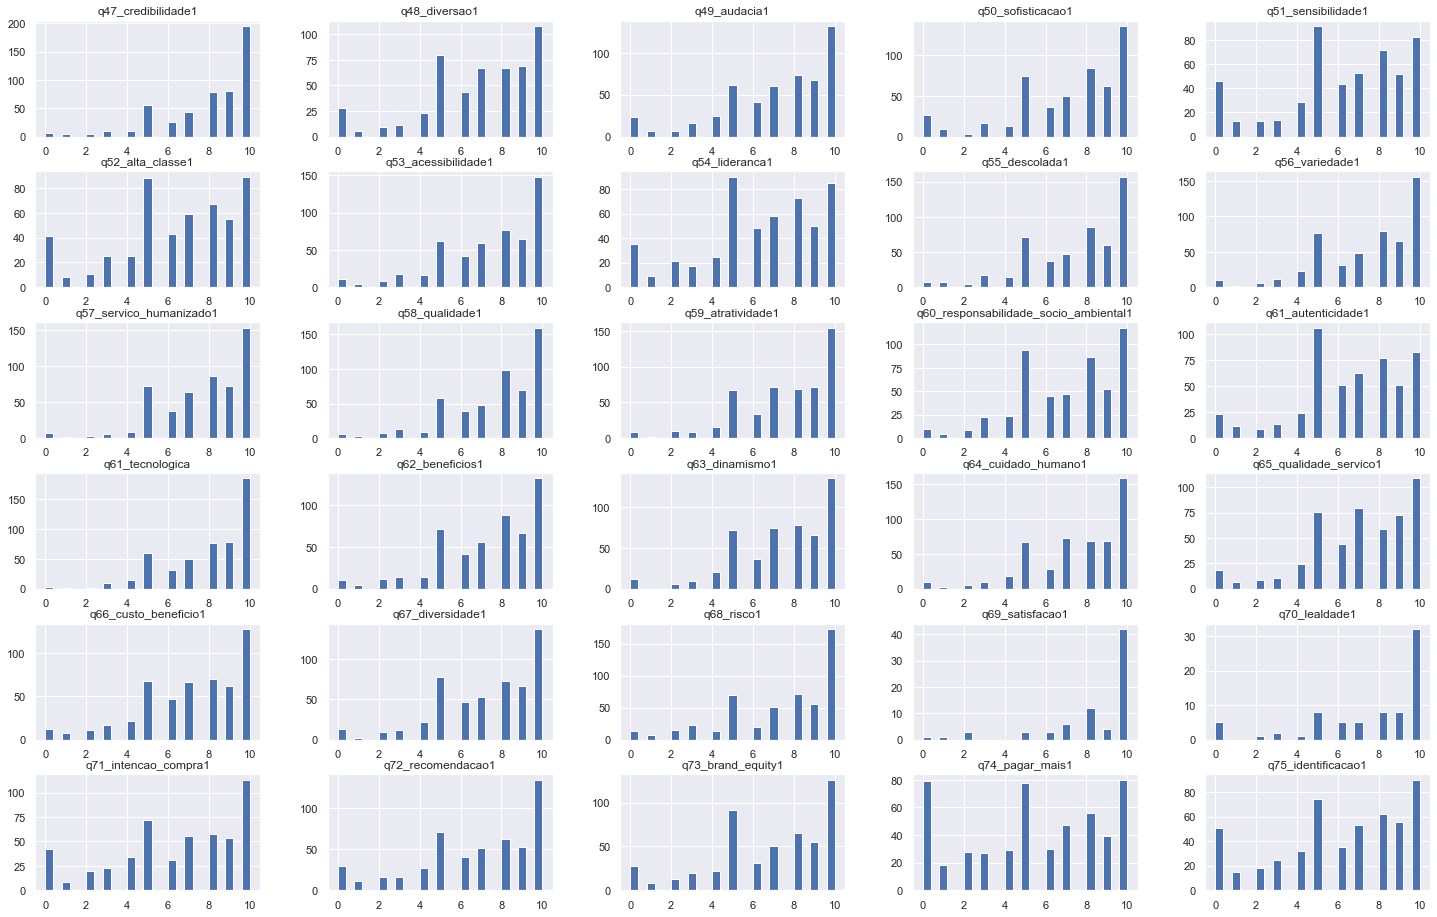

In [186]:
numerical_attributes[colunas_avaliacoes].hist(bins=25, figsize=( 25,16));

## 4.2 Analise Bivariada

 **H1.** Marcas que possuem atributo Liderança deveriam ter mais Satisfação.
 
 **VERDADEIRA** Marcas que possuem Liderança são bem avaliadas no quesito Satisfação.

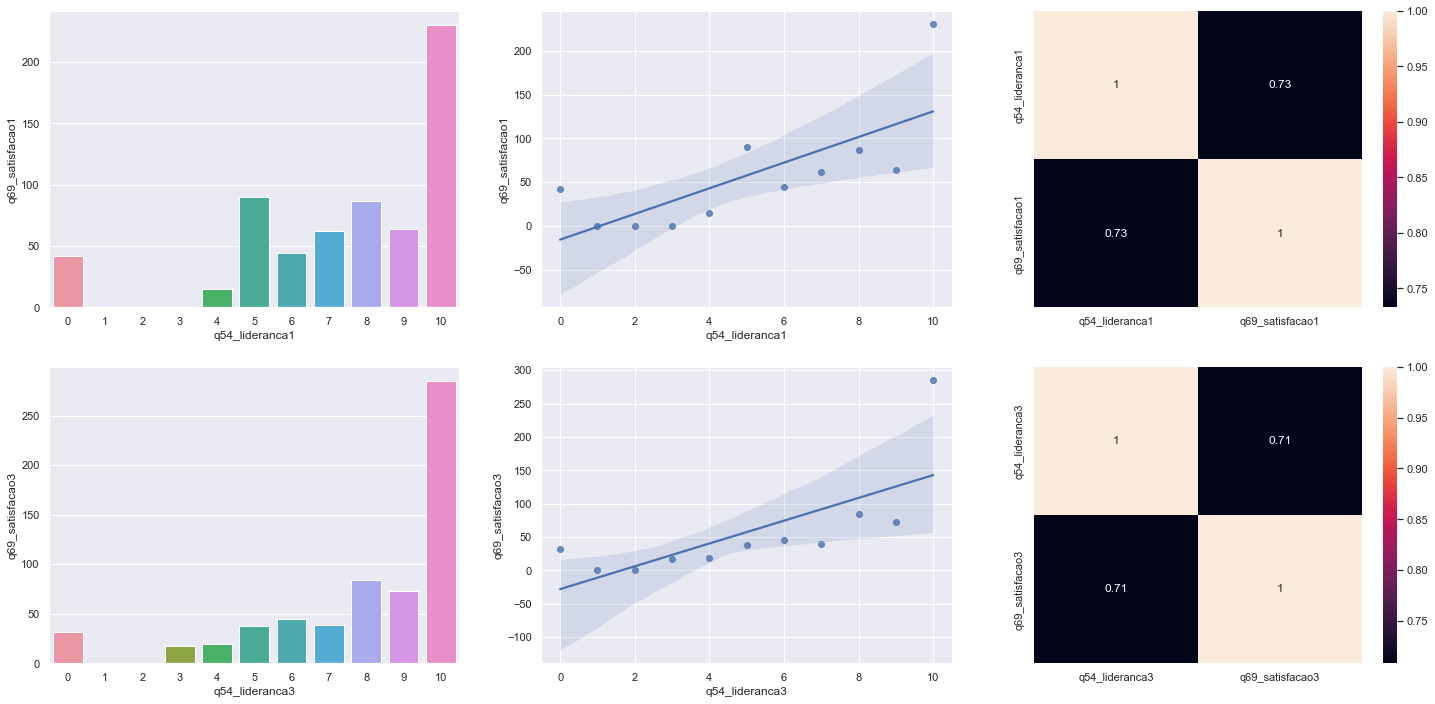

In [187]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q54_lideranca1', 'q69_satisfacao1']].groupby('q54_lideranca1').sum().reset_index()
sns.barplot(x='q54_lideranca1', y='q69_satisfacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q54_lideranca1', y='q69_satisfacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux2 = df4[['q54_lideranca3', 'q69_satisfacao3']].groupby('q54_lideranca3').sum().reset_index()
sns.barplot(x='q54_lideranca3', y='q69_satisfacao3', data=aux2);

plt.subplot( 2, 3, 5)
sns.regplot( x='q54_lideranca3', y='q69_satisfacao3', data=aux2 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux2.corr(method='pearson'), annot=True );

**H2.** Marcas que possuem atributo Liderança deveriam ter mais Identifacação.

**VERDADE.** Marcas que possuem Liderança tem mais Clientes que se identificam com a Marca.

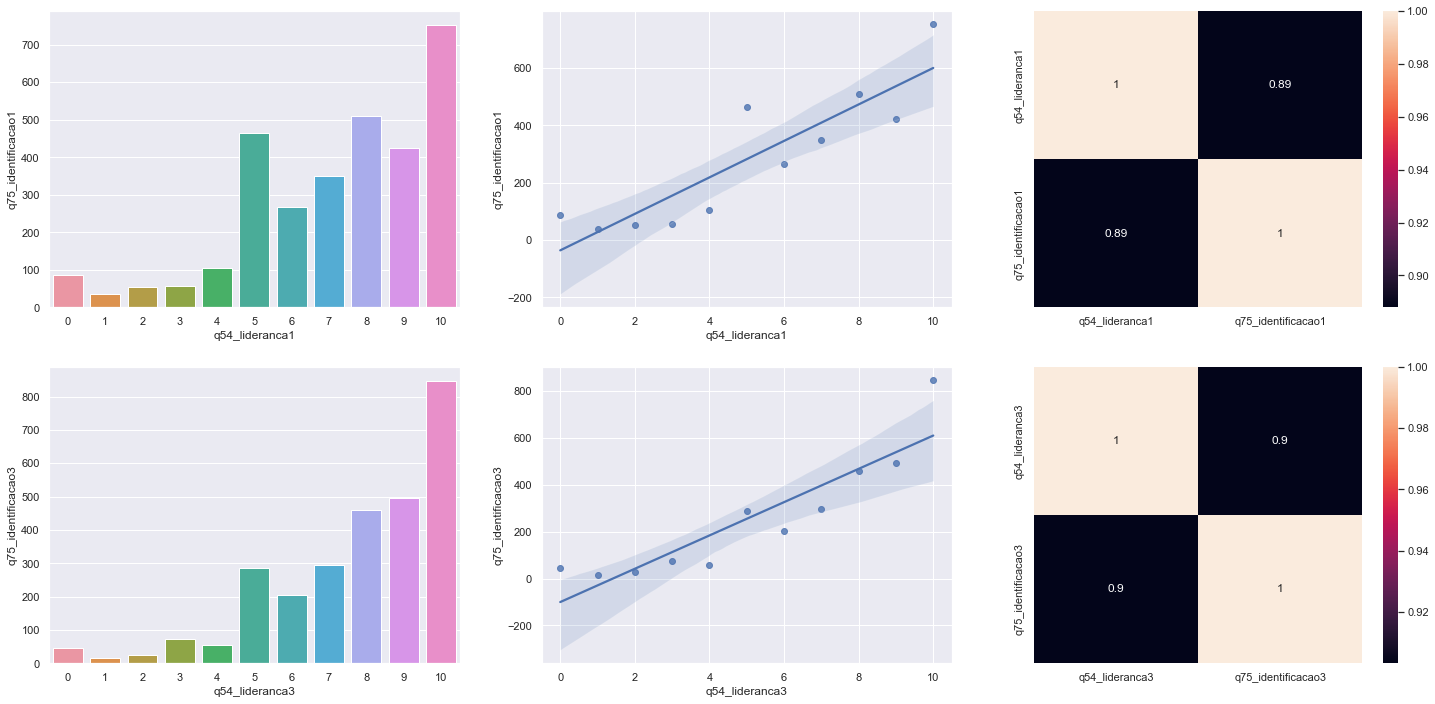

In [188]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q54_lideranca1', 'q75_identificacao1']].groupby('q54_lideranca1').sum().reset_index()
sns.barplot(x='q54_lideranca1', y='q75_identificacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q54_lideranca1', y='q75_identificacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux2 = df4[['q54_lideranca3', 'q75_identificacao3']].groupby('q54_lideranca3').sum().reset_index()
sns.barplot(x='q54_lideranca3', y='q75_identificacao3', data=aux2);

plt.subplot( 2, 3, 5)
sns.regplot( x='q54_lideranca3', y='q75_identificacao3', data=aux2 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux2.corr(method='pearson'), annot=True );

**H3.** Marcas que possuem atributo Liderança deveriam ter mais Lealdade.

**VERDADEIRA.** Marcas que possuem Liderança possuem melhor desempenho em Lealdade do Cliente.

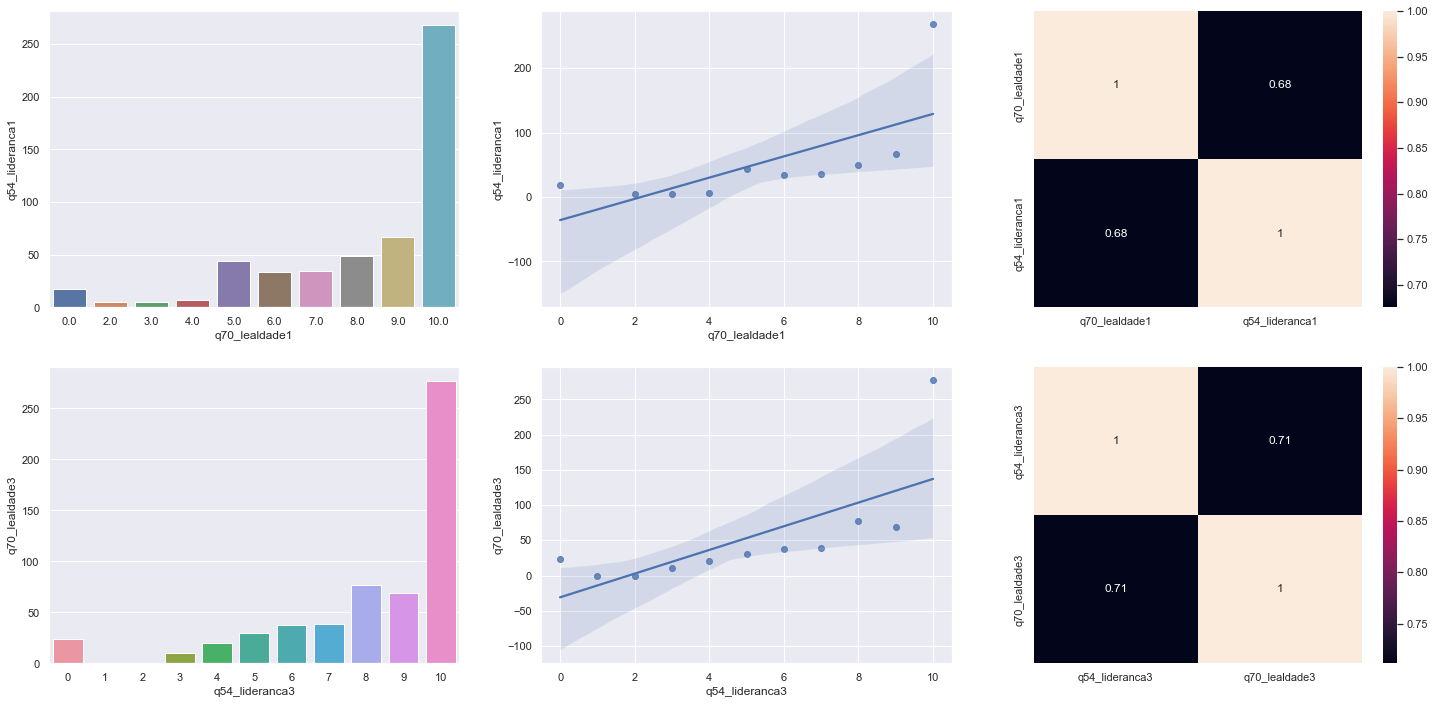

In [191]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q54_lideranca1', 'q70_lealdade1']].groupby('q70_lealdade1').sum().reset_index()
sns.barplot(x='q70_lealdade1', y='q54_lideranca1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q70_lealdade1', y='q54_lideranca1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux2 = df4[['q54_lideranca3', 'q70_lealdade3']].groupby('q54_lideranca3').sum().reset_index()
sns.barplot(x='q54_lideranca3', y='q70_lealdade3', data=aux2);

plt.subplot( 2, 3, 5)
sns.regplot( x='q54_lideranca3', y='q70_lealdade3', data=aux2 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux2.corr(method='pearson'), annot=True );

**H4.** Marcas que possuem o atributo Qualidade de Serviço deveriam ter mais Propensão a Pagar mais pelo serviço e/ou prouto da Marca.

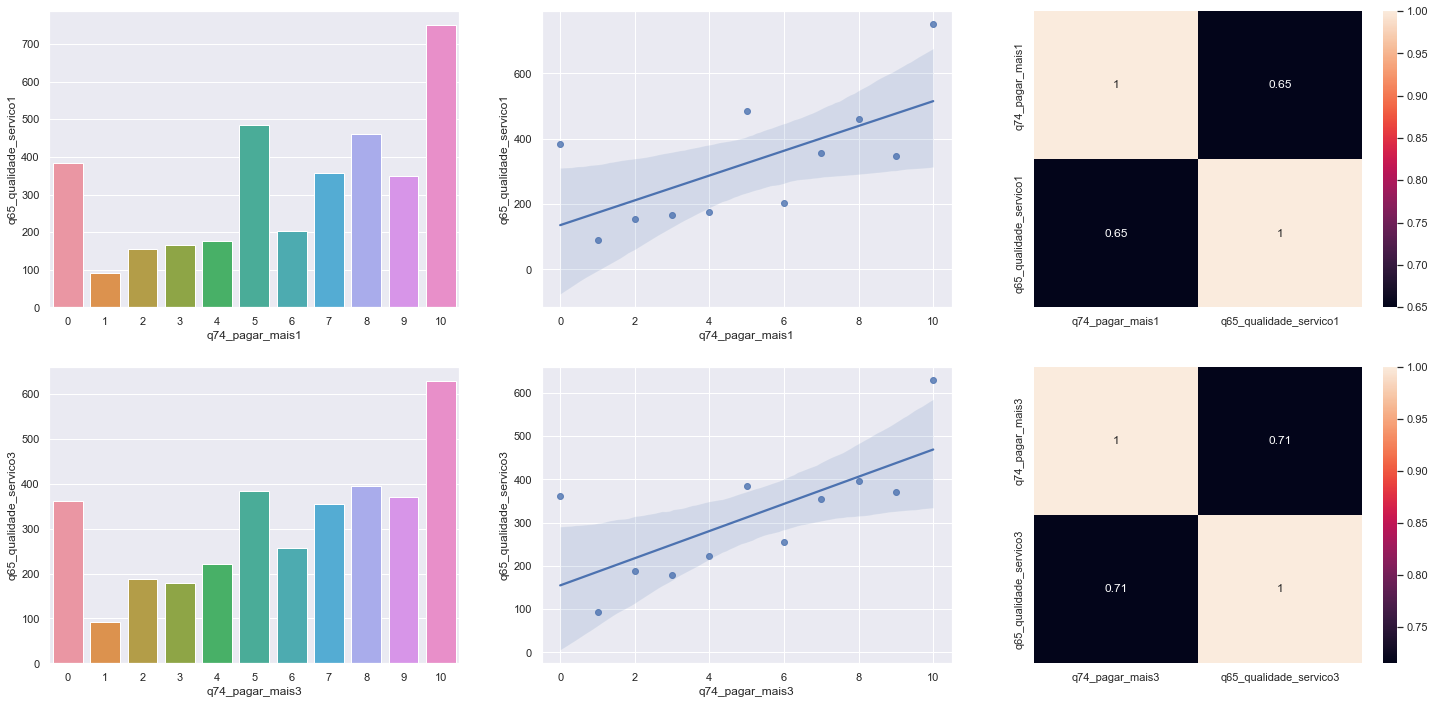

In [192]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q74_pagar_mais1', 'q65_qualidade_servico1']].groupby('q74_pagar_mais1').sum().reset_index()
sns.barplot(x='q74_pagar_mais1', y='q65_qualidade_servico1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q74_pagar_mais1', y='q65_qualidade_servico1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q74_pagar_mais3', 'q65_qualidade_servico3']].groupby('q74_pagar_mais3').sum().reset_index()
sns.barplot(x='q74_pagar_mais3', y='q65_qualidade_servico3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q74_pagar_mais3', y='q65_qualidade_servico3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H5.** Marcas que possuem o atributo Qualidade de Serviço deveriam ter mais Intenção de Compra.

**VERDADEIRA** Marcas com bom desemepnho em Qualidade de Serviço tem mais Intenção de Compra.

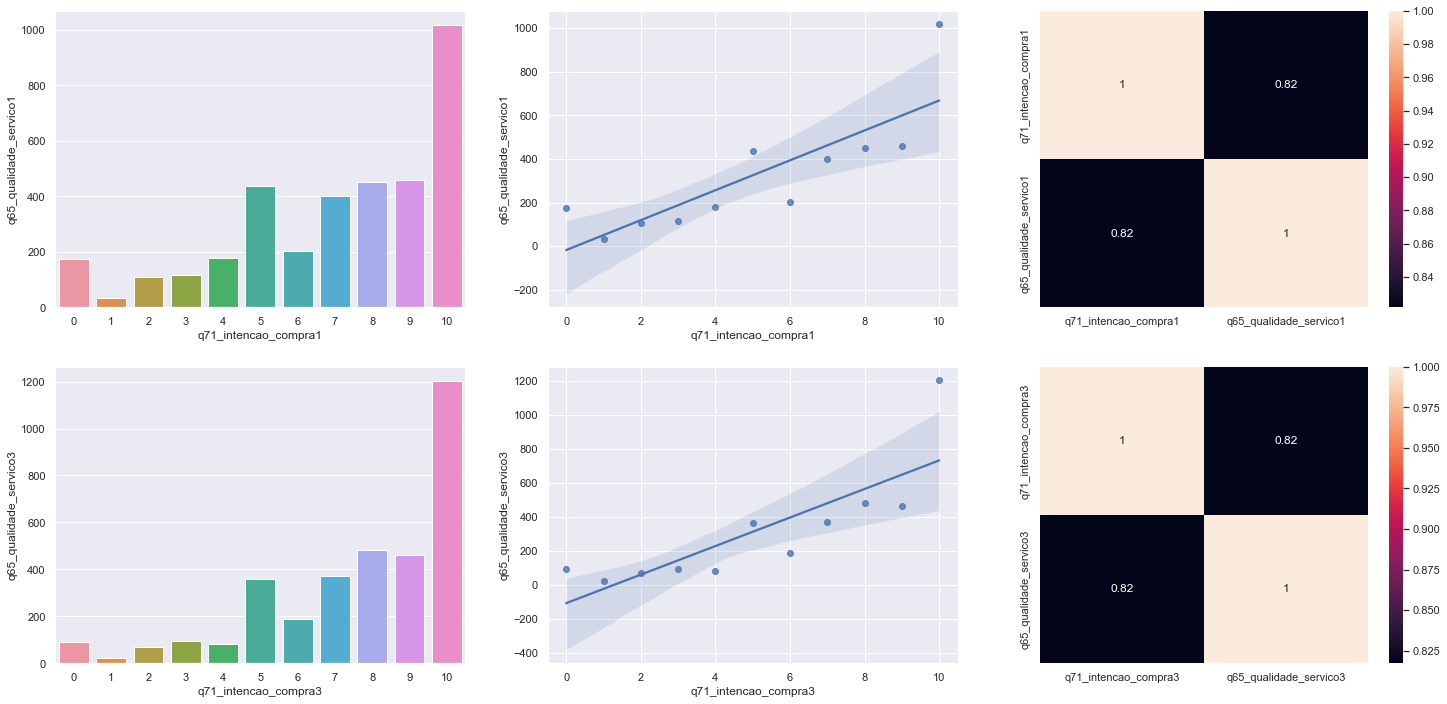

In [195]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q71_intencao_compra1', 'q65_qualidade_servico1']].groupby('q71_intencao_compra1').sum().reset_index()
sns.barplot(x='q71_intencao_compra1', y='q65_qualidade_servico1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q71_intencao_compra1', y='q65_qualidade_servico1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q71_intencao_compra3', 'q65_qualidade_servico3']].groupby('q71_intencao_compra3').sum().reset_index()
sns.barplot(x='q71_intencao_compra3', y='q65_qualidade_servico3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q71_intencao_compra3', y='q65_qualidade_servico3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H6.** Marcas que possuem o atributo Custo Beneficio deveriam ter mais Recomendação.

**VERDADEIRA**. Marcas com desempenho em Custo Beneficio tem mais Recomendação.

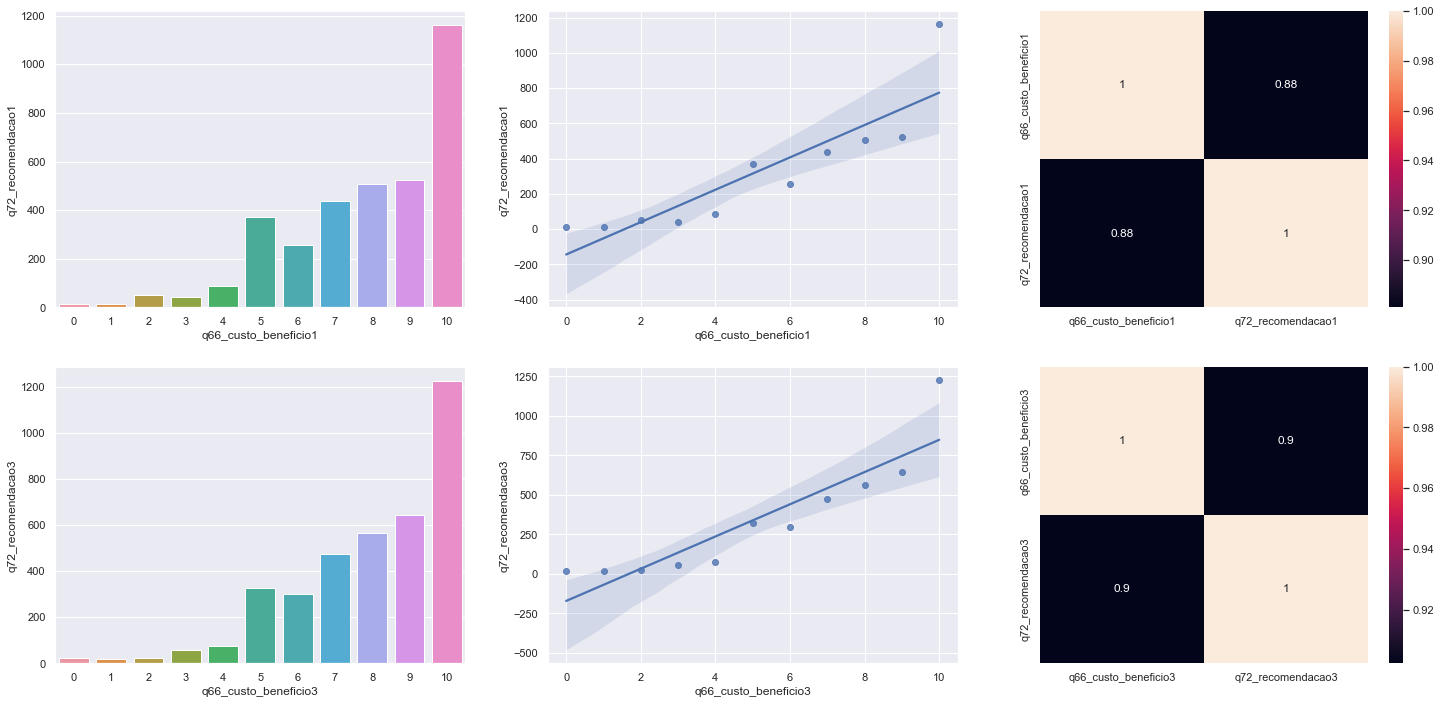

In [198]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q72_recomendacao1', 'q66_custo_beneficio1']].groupby('q66_custo_beneficio1').sum().reset_index()
sns.barplot(x='q66_custo_beneficio1', y='q72_recomendacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q66_custo_beneficio1', y='q72_recomendacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q72_recomendacao3', 'q66_custo_beneficio3']].groupby('q66_custo_beneficio3').sum().reset_index()
sns.barplot(x='q66_custo_beneficio3', y='q72_recomendacao3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q66_custo_beneficio3', y='q72_recomendacao3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H7.** Marcas que possuem o atributo Custo Beneficio deveriam ter mais Intenção de Compra.

**VERDADEIRA.** Marcas que desempenham bem em Custo Beneficio tem mais Intenção de Compra.

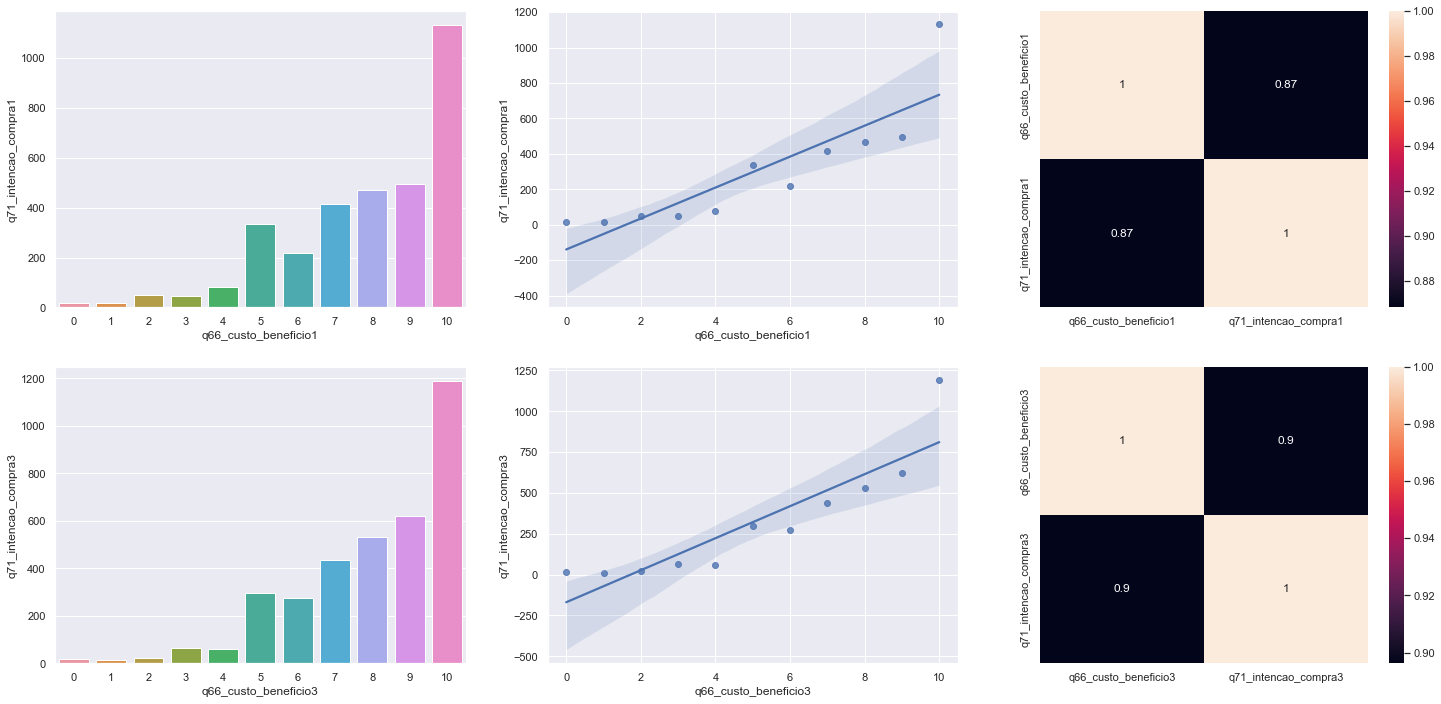

In [201]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q66_custo_beneficio1', 'q71_intencao_compra1']].groupby('q66_custo_beneficio1').sum().reset_index()
sns.barplot(x='q66_custo_beneficio1', y='q71_intencao_compra1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q66_custo_beneficio1', y='q71_intencao_compra1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q66_custo_beneficio3', 'q71_intencao_compra3']].groupby('q66_custo_beneficio3').sum().reset_index()
sns.barplot(x='q66_custo_beneficio3', y='q71_intencao_compra3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q66_custo_beneficio3', y='q71_intencao_compra3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H8.** Marcas que possuem o atributo Identificação deveriam ter mais Autenticidade.

**VERDADEIRA.** Marcas que desempenham em Identificação tem mais Autenticidade.

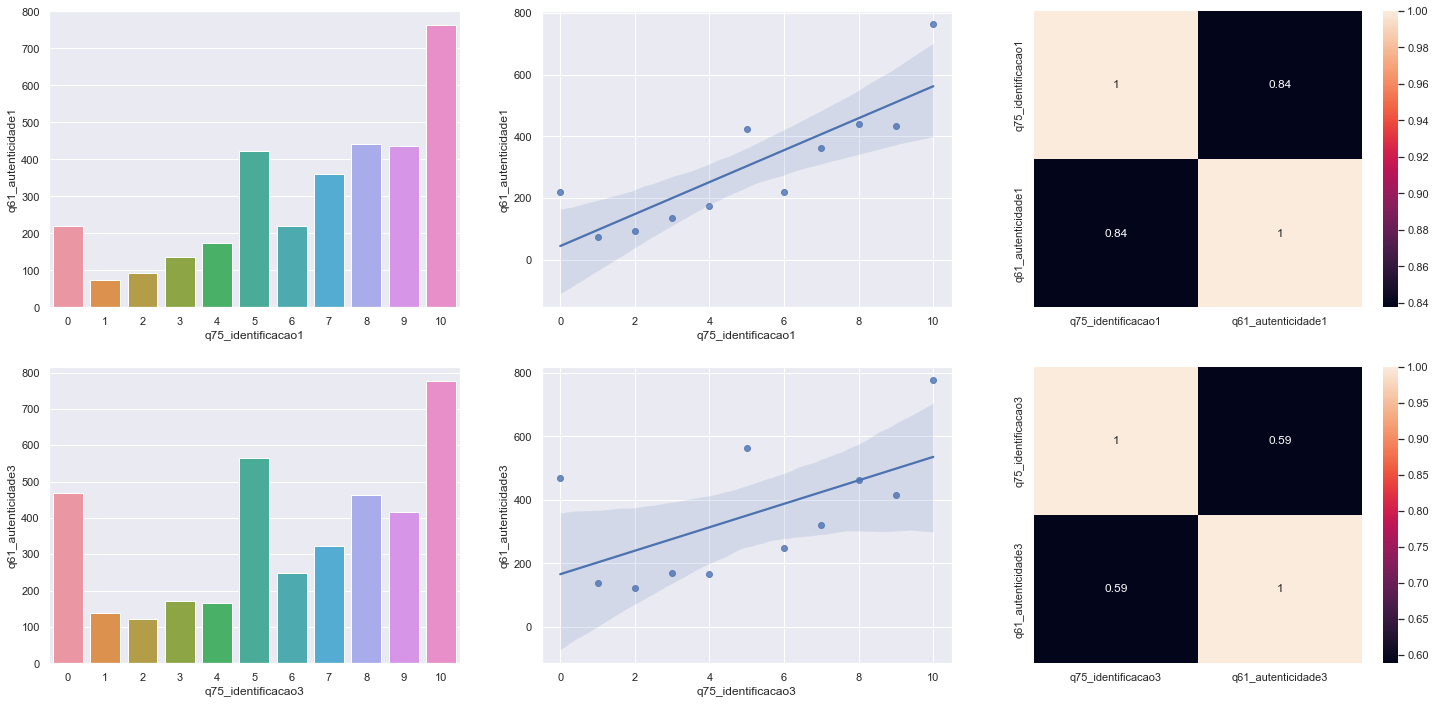

In [202]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q75_identificacao1', 'q61_autenticidade1']].groupby('q75_identificacao1').sum().reset_index()
sns.barplot(x='q75_identificacao1', y='q61_autenticidade1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q75_identificacao1', y='q61_autenticidade1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q75_identificacao3', 'q61_autenticidade3']].groupby('q75_identificacao3').sum().reset_index()
sns.barplot(x='q75_identificacao3', y='q61_autenticidade3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q75_identificacao3', y='q61_autenticidade3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H9.** Marcas que possuem o atributo Identificação deveriam ter mais Lealdade.

**VERDADEIRA**. Marcas que desempenham em Identificação tem mais Lealdade.

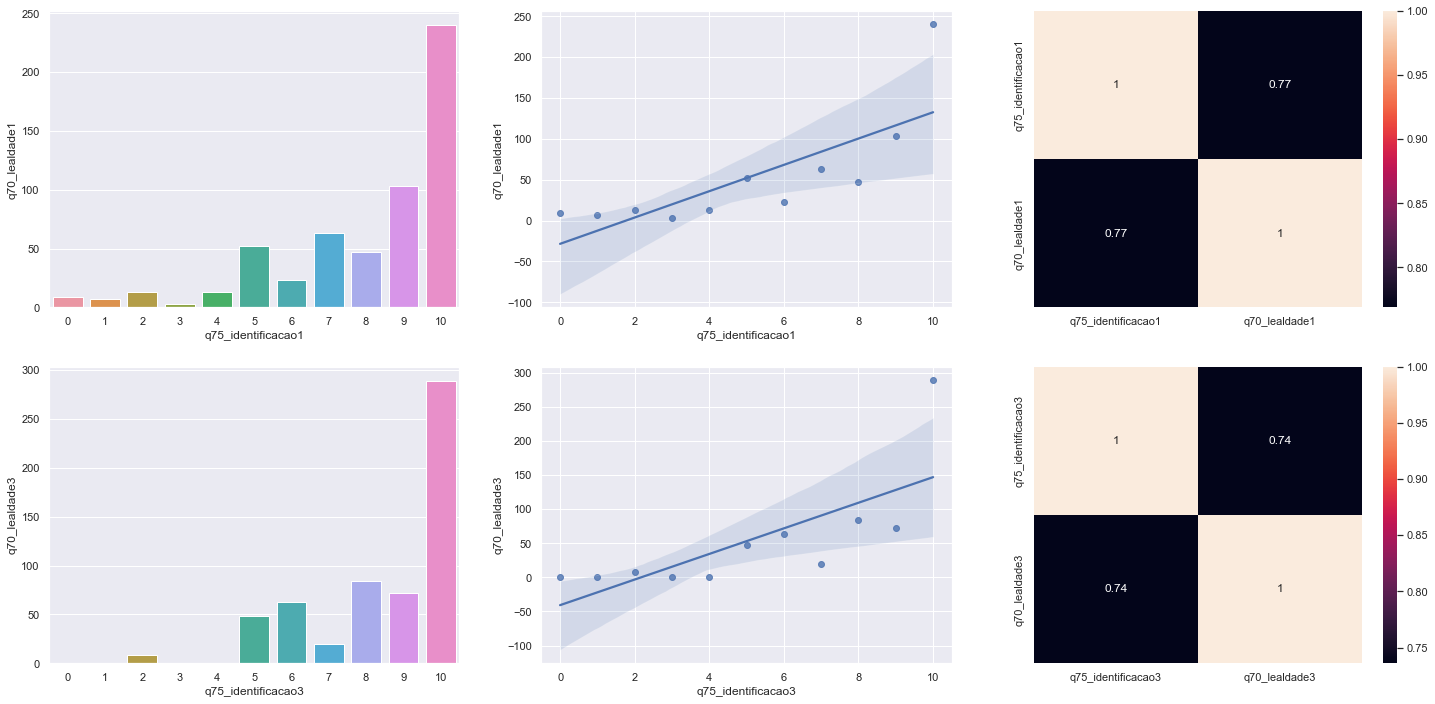

In [203]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q75_identificacao1', 'q70_lealdade1']].groupby('q75_identificacao1').sum().reset_index()
sns.barplot(x='q75_identificacao1', y='q70_lealdade1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q75_identificacao1', y='q70_lealdade1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q75_identificacao3', 'q70_lealdade3']].groupby('q75_identificacao3').sum().reset_index()
sns.barplot(x='q75_identificacao3', y='q70_lealdade3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q75_identificacao3', y='q70_lealdade3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H10.** Marcas que possuem Brand Equity deveriam ter mais Identificação.

**VERDADEIRA** Marcas com bom desempenho em Brand Equity tem mais Identificação.

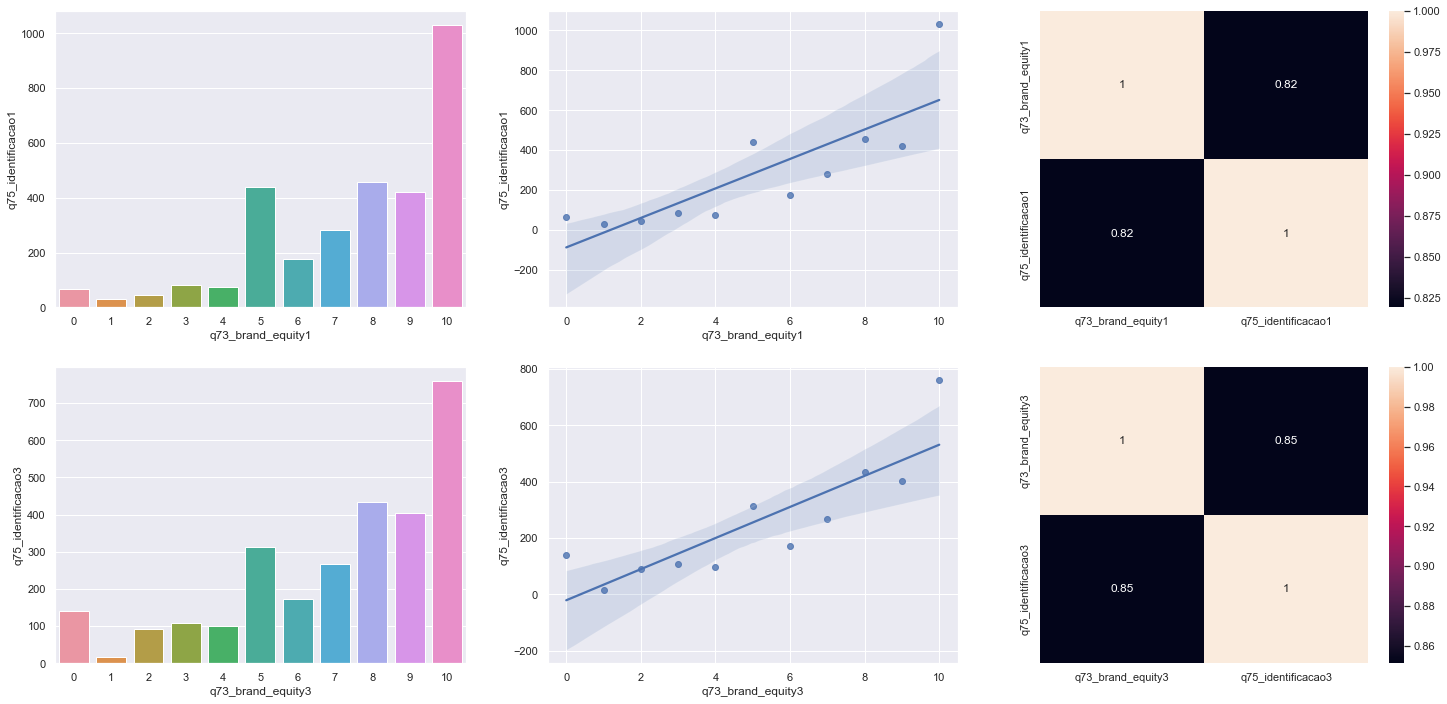

In [204]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q73_brand_equity1', 'q75_identificacao1']].groupby('q73_brand_equity1').sum().reset_index()
sns.barplot(x='q73_brand_equity1', y='q75_identificacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q73_brand_equity1', y='q75_identificacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q73_brand_equity3', 'q75_identificacao3']].groupby('q73_brand_equity3').sum().reset_index()
sns.barplot(x='q73_brand_equity3', y='q75_identificacao3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q73_brand_equity3', y='q75_identificacao3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H11.** Marcas que possuem Brand Equity deveriam ter mais Propensão a Pagar mais.

**VERDADEIRA**. Marcas com desempenho em Brand Equity os clientes tem propensão a pagar mais pelo produto e/ou serviço.

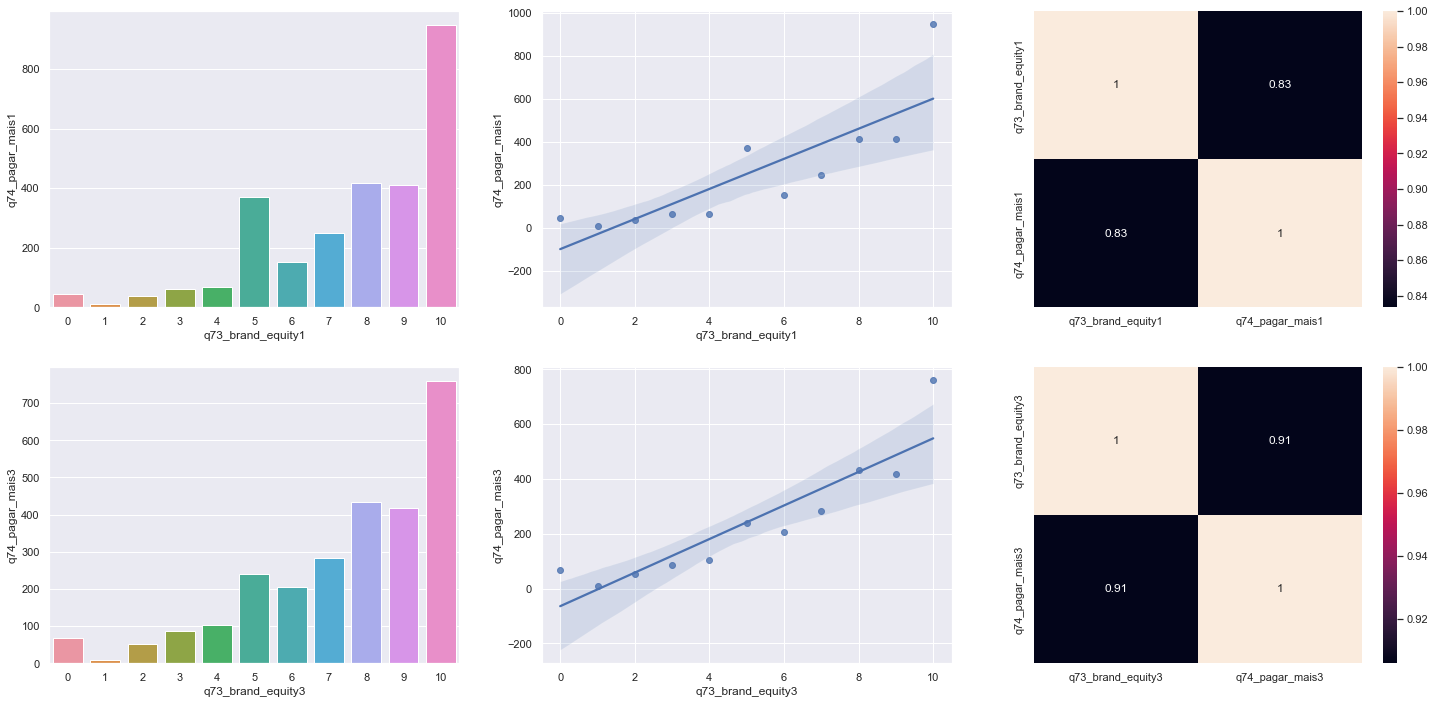

In [206]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q73_brand_equity1', 'q74_pagar_mais1']].groupby('q73_brand_equity1').sum().reset_index()
sns.barplot(x='q73_brand_equity1', y='q74_pagar_mais1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q73_brand_equity1', y='q74_pagar_mais1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q73_brand_equity3', 'q74_pagar_mais3']].groupby('q73_brand_equity3').sum().reset_index()
sns.barplot(x='q73_brand_equity3', y='q74_pagar_mais3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q73_brand_equity3', y='q74_pagar_mais3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H12.** Marcas que possuem o atributo Satisfação deveriam ter mais Lealdade.

**VERDADEIRA** Marcas que desempenham em Satisfação tem mais Lealdade. 

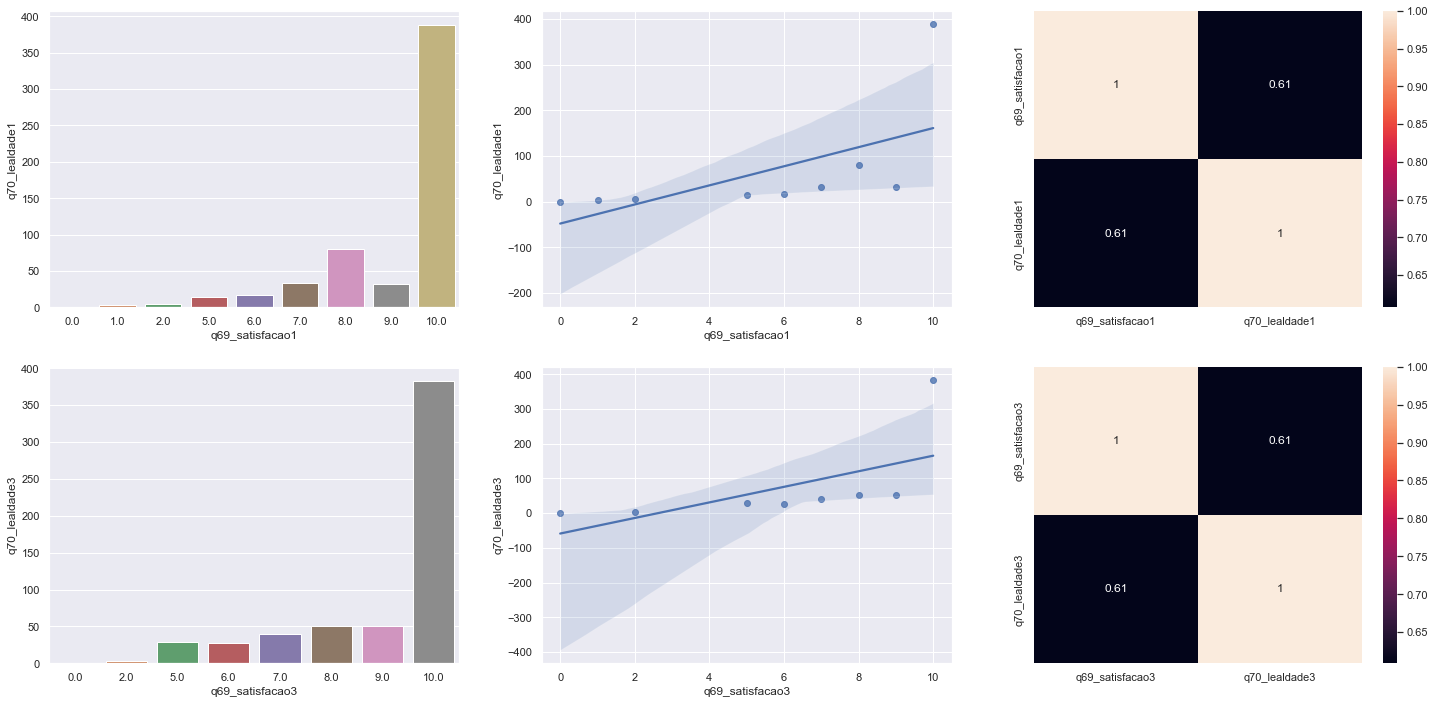

In [207]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q69_satisfacao1', 'q70_lealdade1']].groupby('q69_satisfacao1').sum().reset_index()
sns.barplot(x='q69_satisfacao1', y='q70_lealdade1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q69_satisfacao1', y='q70_lealdade1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q69_satisfacao3', 'q70_lealdade3']].groupby('q69_satisfacao3').sum().reset_index()
sns.barplot(x='q69_satisfacao3', y='q70_lealdade3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q69_satisfacao3', y='q70_lealdade3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H13.** Marcas que possuem o atributo Satisfação deveriam ter mais Recomendação.

**VERDADEIRA** Marcas que desempenham em Satisfação tem mais Recomendação.

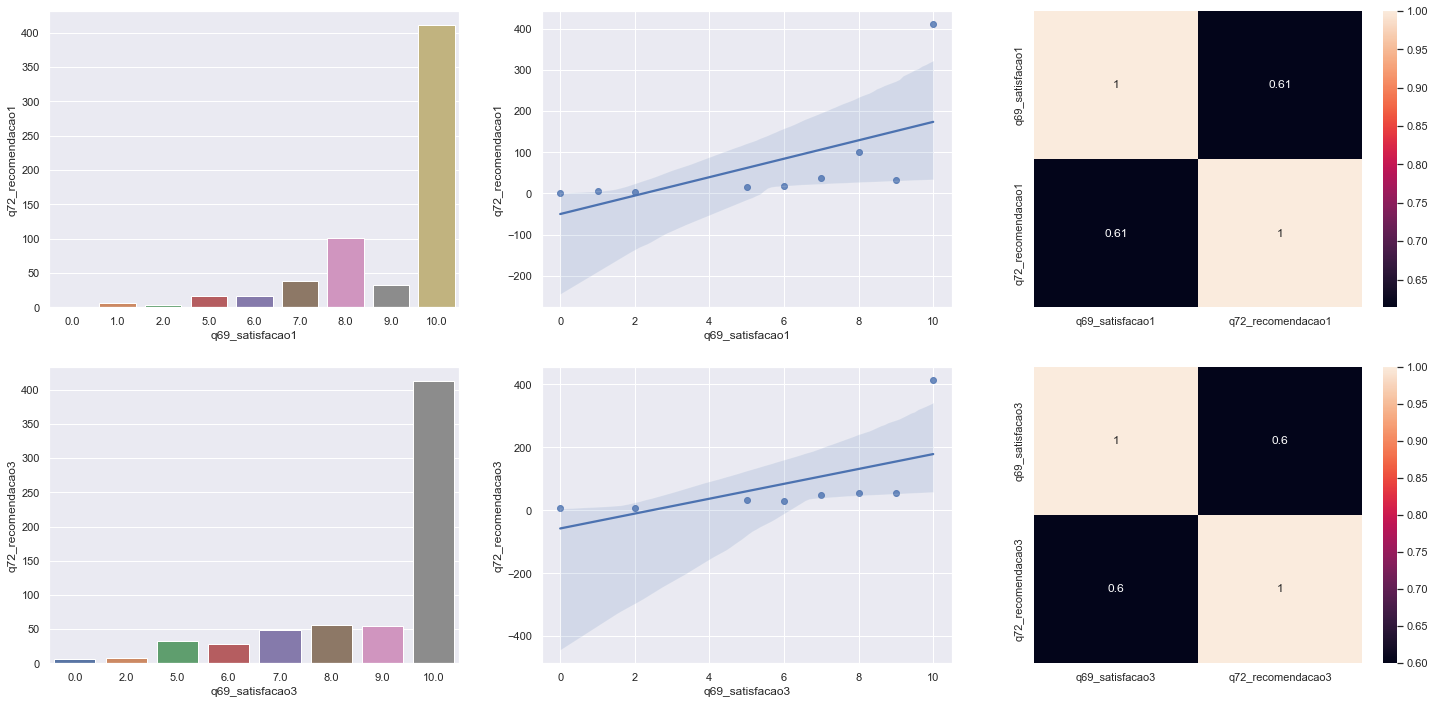

In [208]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q69_satisfacao1', 'q72_recomendacao1']].groupby('q69_satisfacao1').sum().reset_index()
sns.barplot(x='q69_satisfacao1', y='q72_recomendacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q69_satisfacao1', y='q72_recomendacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q69_satisfacao3', 'q72_recomendacao3']].groupby('q69_satisfacao3').sum().reset_index()
sns.barplot(x='q69_satisfacao3', y='q72_recomendacao3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q69_satisfacao3', y='q72_recomendacao3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H14.** Marcas que com desempenho no atributo Lealdade deveriam ter mais Intenção de Compra.

**VERDADEIRA** Marcas que desempenha em Lealdade tem mais Intenção de Compra.

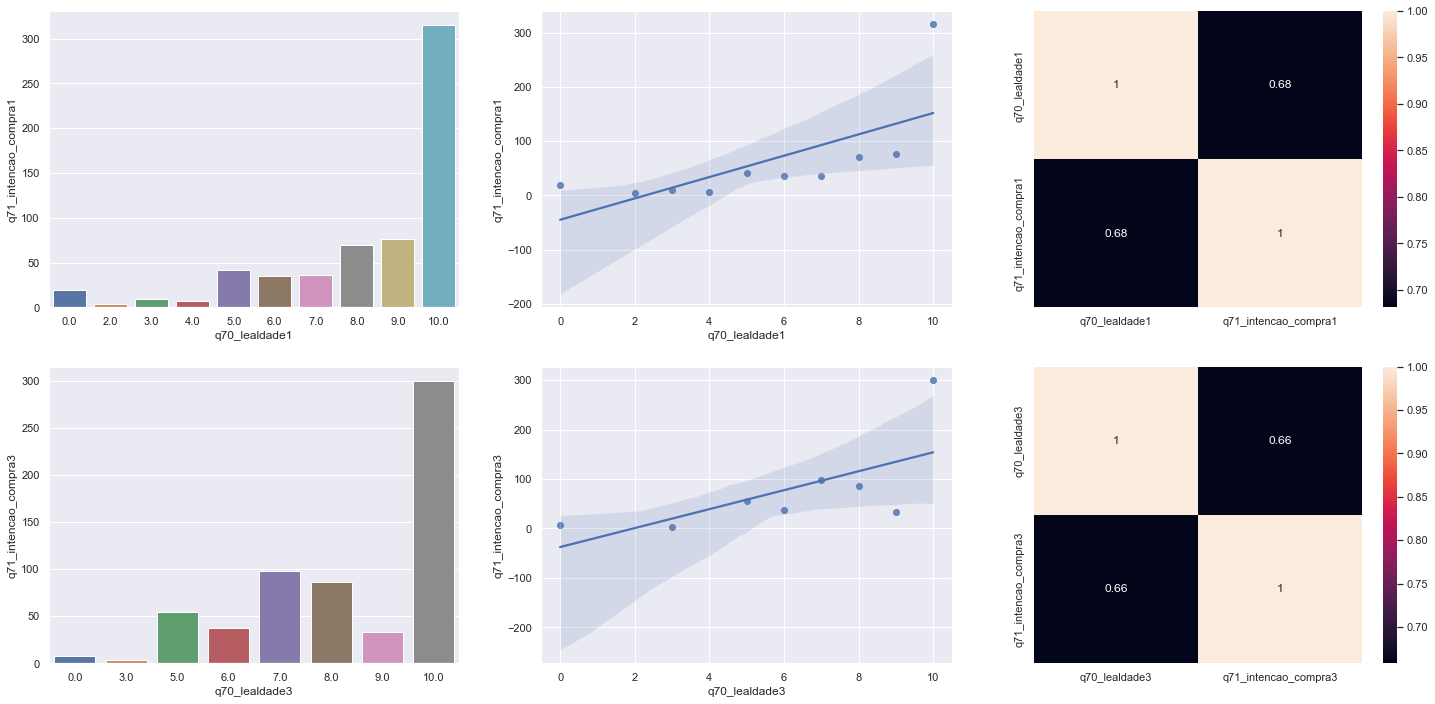

In [209]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q70_lealdade1', 'q71_intencao_compra1']].groupby('q70_lealdade1').sum().reset_index()
sns.barplot(x='q70_lealdade1', y='q71_intencao_compra1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q70_lealdade1', y='q71_intencao_compra1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q70_lealdade3', 'q71_intencao_compra3']].groupby('q70_lealdade3').sum().reset_index()
sns.barplot(x='q70_lealdade3', y='q71_intencao_compra3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q70_lealdade3', y='q71_intencao_compra3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H15.** Marcas que possuem o atributo Lealdade deveriam ter mais Identificação.

**VERDADEIRA** Marcas que desempenha em Lealdade tem mais Identificação.

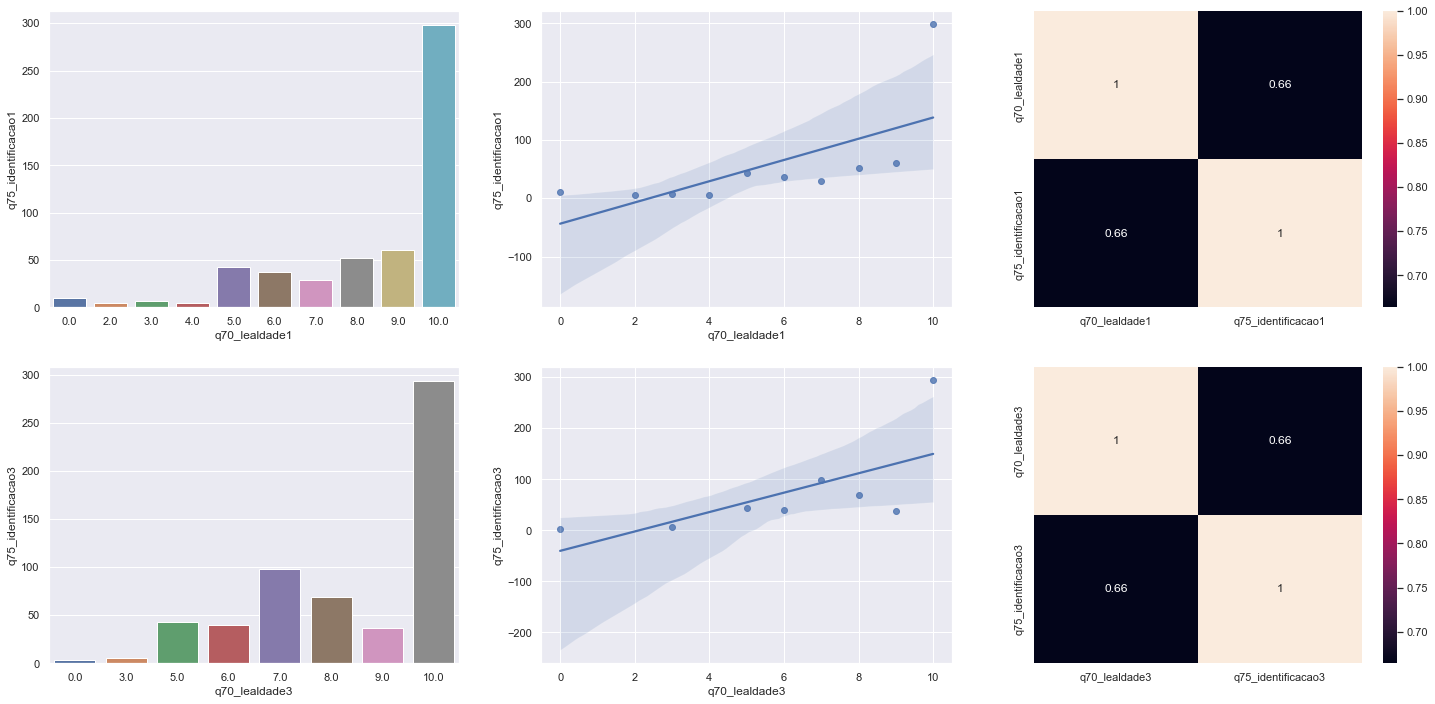

In [211]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q70_lealdade1', 'q75_identificacao1']].groupby('q70_lealdade1').sum().reset_index()
sns.barplot(x='q70_lealdade1', y='q75_identificacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q70_lealdade1', y='q75_identificacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q70_lealdade3', 'q75_identificacao3']].groupby('q70_lealdade3').sum().reset_index()
sns.barplot(x='q70_lealdade3', y='q75_identificacao3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q70_lealdade3', y='q75_identificacao3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H16.** Marcas que possuem maior Intenção de Compra deveriam ter mais Satisfação.

**VERDADEIRA** Marcas que desempenha em Intenção de compra tem mais Satisfação.

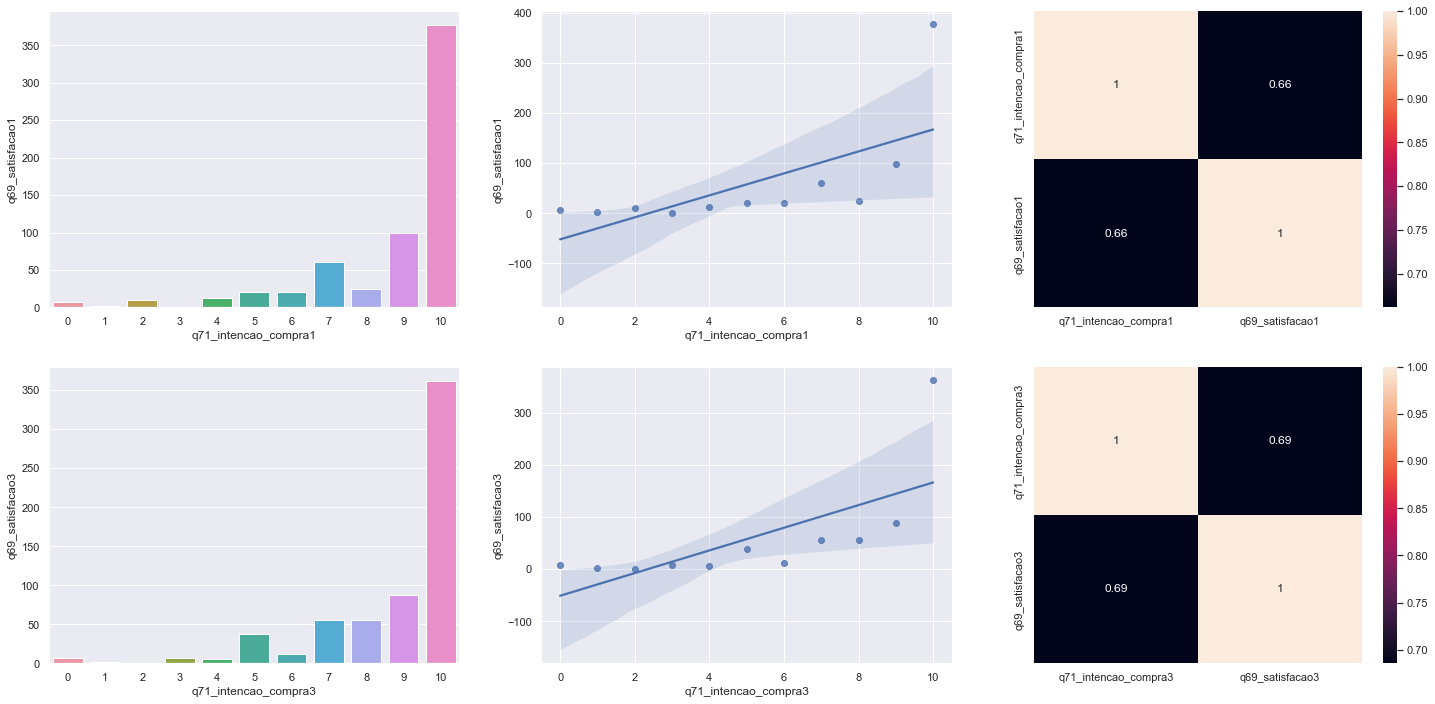

In [212]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q71_intencao_compra1', 'q69_satisfacao1']].groupby('q71_intencao_compra1').sum().reset_index()
sns.barplot(x='q71_intencao_compra1', y='q69_satisfacao1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q71_intencao_compra1', y='q69_satisfacao1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q71_intencao_compra3', 'q69_satisfacao3']].groupby('q71_intencao_compra3').sum().reset_index()
sns.barplot(x='q71_intencao_compra3', y='q69_satisfacao3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q71_intencao_compra3', y='q69_satisfacao3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

**H17.** Marcas que possuem maior Recomendação deveriam ter mais Propensão a Pagar Mais.

**VERDADEIRA**. Marcas com desempenho em Recomendação tem mais propensão ao cliente pagar mais pelo produto e/ou serviço.

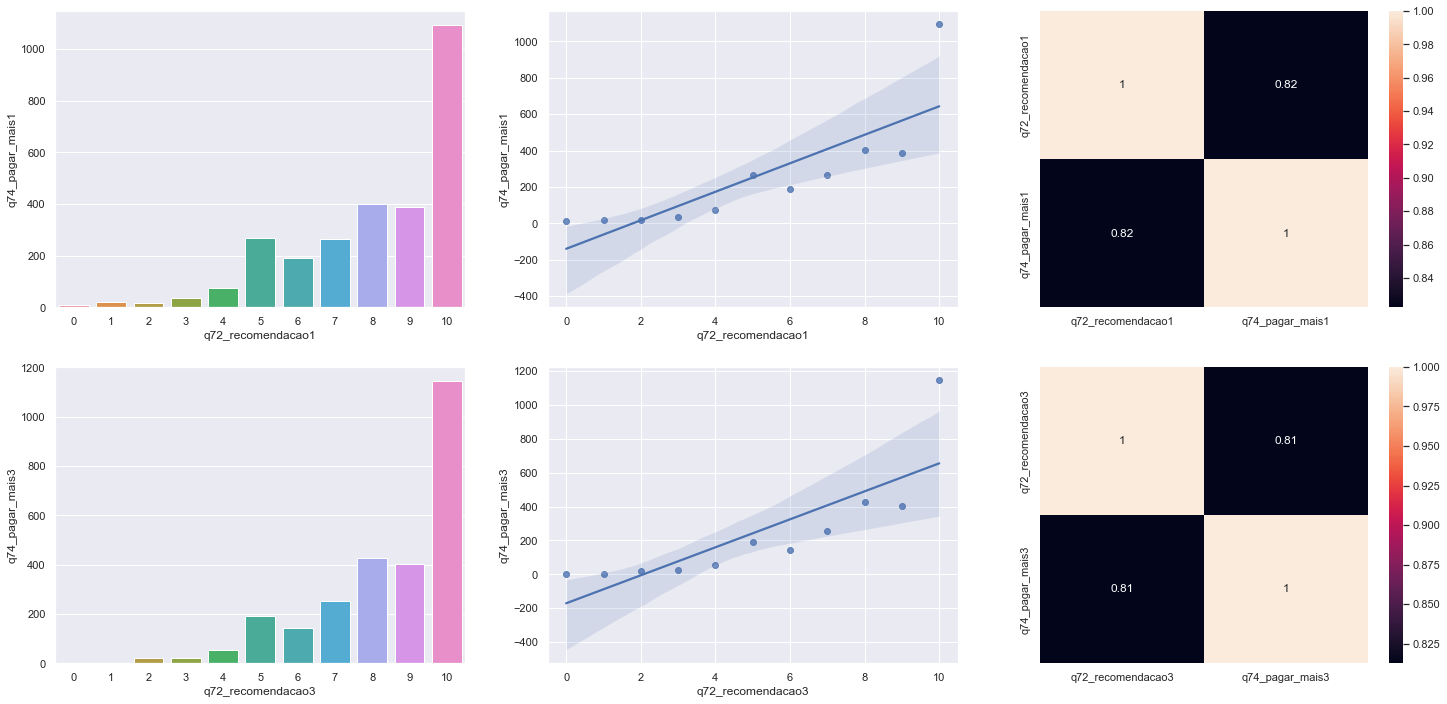

In [214]:
plt.subplot( 2, 3, 1)
aux1 = df4[['q72_recomendacao1', 'q74_pagar_mais1']].groupby('q72_recomendacao1').sum().reset_index()
sns.barplot(x='q72_recomendacao1', y='q74_pagar_mais1', data=aux1);

plt.subplot( 2, 3, 2)
sns.regplot( x='q72_recomendacao1', y='q74_pagar_mais1', data=aux1 );

plt.subplot( 2, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

plt.subplot( 2, 3, 4)
aux1 = df4[['q72_recomendacao3', 'q74_pagar_mais3']].groupby('q72_recomendacao3').sum().reset_index()
sns.barplot(x='q72_recomendacao3', y='q74_pagar_mais3', data=aux1);

plt.subplot( 2, 3, 5)
sns.regplot( x='q72_recomendacao3', y='q74_pagar_mais3', data=aux1 );

plt.subplot( 2, 3, 6)
sns.heatmap( aux1.corr(method='pearson'), annot=True );

## 4.3 Resumo das Hipóteses

In [216]:
tab = [['Hipótese', 'Conclusão', 'Relevância'],
        ['H1', 'VERDADEIRA', 'ALTA'],
        ['H2', 'VERDADEIRA', 'ALTA'],
        ['H3', 'VERDADEIRA', 'MÉDIA'],
        ['H4', 'VERDADEIRA', 'MÉDIA'],
        ['H5', 'VERDADEIRA', 'ALTA'],
        ['H6', 'VERDADEIRA', 'ALTA'],
        ['H7', 'VERDADEIRA', 'ALTA'],
        ['H8', 'VERDADEIRA', 'ALTA'],
        ['H9', 'VERDADEIRA', 'ALTA'],
        ['H10', 'VERDADEIRA', 'ALTA'],
        ['H11', 'VERDADEIRA', 'ALTA'],
        ['H12', 'VERDADEIRA', 'MÉDIA'],
        ['H13', 'VERDADEIRA', 'MÉDIA'],
        ['H14', 'VERDADEIRA', 'MÉDIA'],
        ['H15', 'VERDADEIRA', 'MÉDIA'],
        ['H16', 'VERDADEIRA', 'MÉDIA'],
        ['H17', 'VERDADEIRA', 'ALTA'],
      ]
print( tabulate ( tab, headers='firstrow'))

Hipótese    Conclusão    Relevância
----------  -----------  ------------
H1          VERDADEIRA   ALTA
H2          VERDADEIRA   ALTA
H3          VERDADEIRA   MÉDIA
H4          VERDADEIRA   MÉDIA
H5          VERDADEIRA   ALTA
H6          VERDADEIRA   ALTA
H7          VERDADEIRA   ALTA
H8          VERDADEIRA   ALTA
H9          VERDADEIRA   ALTA
H10         VERDADEIRA   ALTA
H11         VERDADEIRA   ALTA
H12         VERDADEIRA   MÉDIA
H13         VERDADEIRA   MÉDIA
H14         VERDADEIRA   MÉDIA
H15         VERDADEIRA   MÉDIA
H16         VERDADEIRA   MÉDIA
H17         VERDADEIRA   ALTA


## 4.3 Analise Multivariada

<AxesSubplot:>

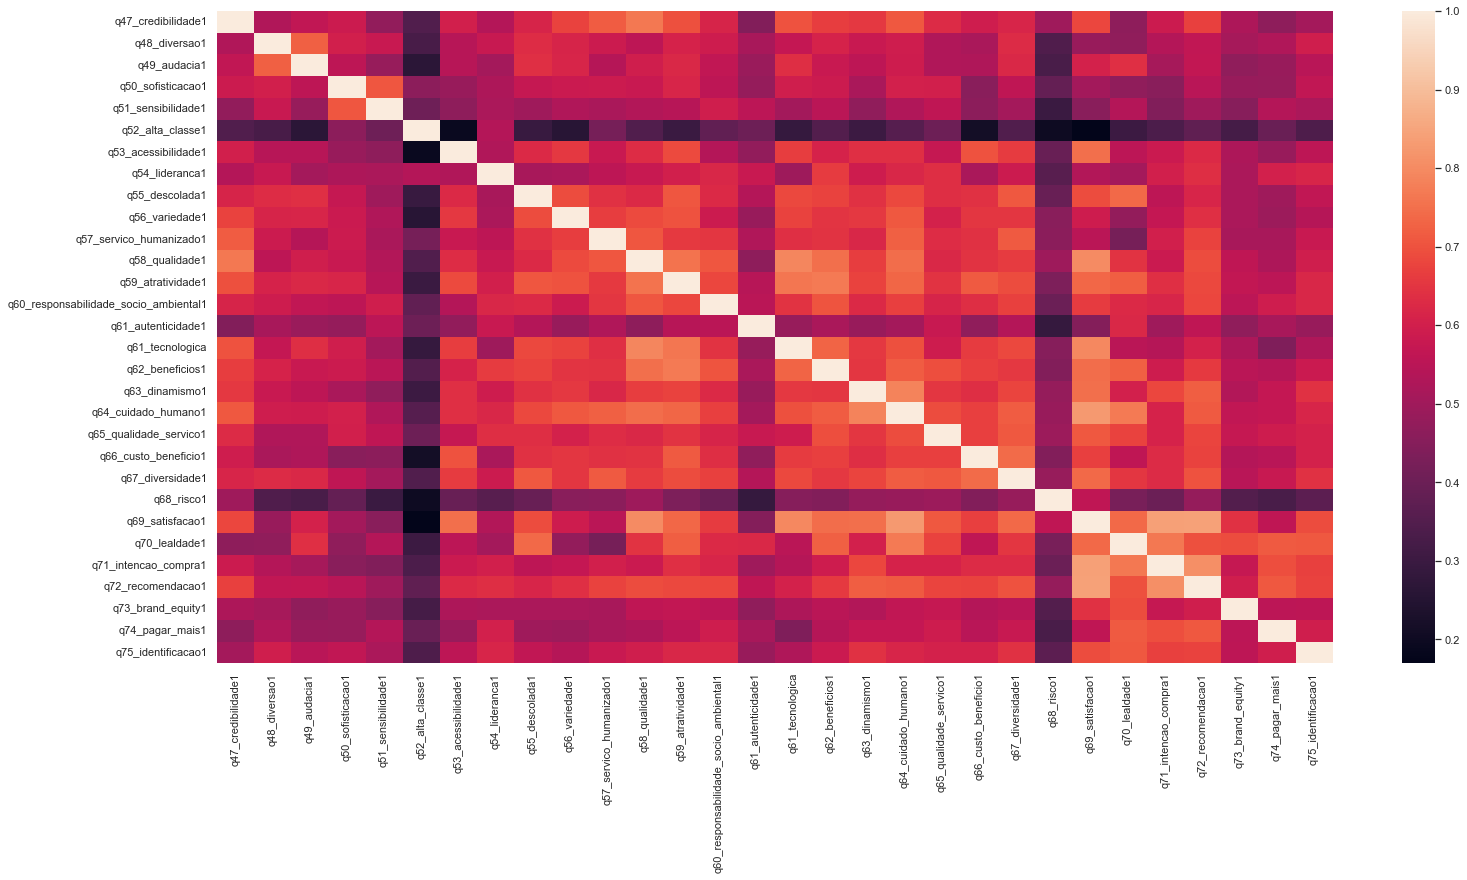

In [218]:
sns.heatmap(df3[colunas_avaliacoes].corr(method='pearson'))

# 5.0 CONCLUSÃO

## Aprendizados

**1.** Marcas que possuem atributo Liderança tem clientes mais identificados com a Marca.

**2.** Marcas que possuem o atributo Custo Beneficio tem mais clientes que recomendam a Marca.

**3.** Marcas que possuem Brand Equity tem mais clientes propensos a Pagar Mais pelo produto e/ou serviço.

## Recomendações Para O Negócio